In [1]:
import pandas as pd
df3_con = pd.read_csv("T:\sem_3\data driven policy\chatgpt_upd_sent.csv")

In [2]:
len(df3_con)

27976

In [3]:
df3_con.head()

Unnamed: 0  appVersion          at  \
0           0  1.2023.281  10/14/2023   
1           1  1.2023.284  10/22/2023   
2           2  1.2023.263  10/12/2023   
3           3  1.2023.284  10/18/2023   
4           4  1.2023.256   9/21/2023   

                                             content         repliedAt  \
0  Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1  The paid version is kind of expensive, in my o...               NaN   
2  The "Voice Conversations" feature is fantastic...               NaN   
3  The ChatGPT app is absolutely phenomenal! It's...               NaN   
4  Easily the best app I've ever downloaded. High...               NaN   

                             replyContent reviewCreatedVersion  \
0  Are you still experiencing this issue?           1.2023.281   
1                                     NaN           1.2023.284   
2                                     NaN           1.2023.263   
3                                     NaN           1.2023.284   
4                                     NaN           1.2023.256   

                               reviewId  score  thumbsUpCount  \
0  1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1  1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2  e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3  bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4  82bedff5-5220-45e7-b89a-65054268c85c      5            720   

                                           userImage        userName  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...           Wes A   
1  https://play-lh.googleusercontent.com/a-/ALV-U...     Bryan Creel   
2  https://play-lh.googleusercontent.com/a-/ALV-U...     Matt Larson   
3  https://play-lh.googleusercontent.com/a-/ALV-U...  Nathan Telkamp   
4  https://play-lh.googleusercontent.com/a/ACg8oc...    Alex Ledford   

                                       content_clean  sentiment_score  \
0  voice conversations choppy doesnt work anymore...             0.28   
1  the paid version is kind of expensive in my op...             0.25   
2  the voice conversations feature is fantastic b...             0.28   
3  the chatgpt app is absolutely phenomenal its b...             0.19   
4  easily the best app ive ever downloaded highly...             0.24   

  sentiment_label  Unnamed: 15 Unnamed: 16 Unnamed: 17  
0        Positive          NaN         NaN         NaN  
1        Positive          NaN         NaN         NaN  
2        Positive          NaN         NaN         NaN  
3        Positive          NaN         NaN         NaN  
4        Positive          NaN         NaN         NaN

In [4]:
df3_con.drop(['Unnamed: 0','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)


In [171]:
reply_data = pd.DataFrame(df3_con)
reply_data.dropna(subset=['replyContent'], inplace=True)

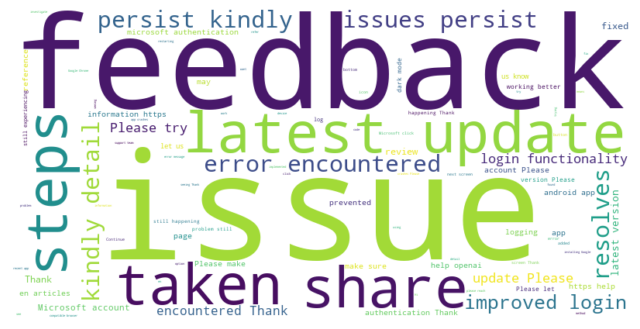

In [173]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(reply_data['replyContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [5]:
len(df3_con)

27976

In [175]:
# Sentiment by app version
df_app_version = df3_con.groupby('appVersion')[['sentiment_label', 'sentiment_score']].mean()

# Word correlations with sentiment
word_correlations = df3_con['content_clean'].astype(str).str.split().apply(lambda x: pd.Series(x).apply(lambda word: len(word) if isinstance(word, str) else None).corr(df3_con['sentiment_score']))

# User sentiment distribution  
user_sentiment_distribution = df3_con.groupby('userName')[['sentiment_label']].value_counts()

KeyboardInterrupt: 

In [ ]:
# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Sentiment by app version
plt.subplot(131)
df_app_version['sentiment_score'].plot(kind='bar', title='Sentiment by App Version')
plt.xlabel('App Version')
plt.ylabel('Mean Sentiment Score')

# Plot 2: Word correlations with sentiment
plt.subplot(132)
word_correlations.plot(kind='hist', title='Word Correlations with Sentiment')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

# Plot 3: User sentiment distribution
plt.subplot(133)
user_sentiment_distribution.unstack().plot(kind='bar', stacked=True, title='User Sentiment Distribution')
plt.xlabel('User')
plt.ylabel('Sentiment Count')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.tight_layout()
plt.show()

In [176]:
df3_con

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27971    1.0.0016   7/25/2023   
27972    1.0.0016   7/25/2023   
27973    1.0.0016   7/25/2023   
27974    1.0.0016   7/25/2023   
27975    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27971                                     ❤️❤️❤️❤️❤️❤️❤️               NaN   
27972                                             ❤️❤️❤️               NaN   
27973                                                 ❤️               NaN   
27974                                             ❤️❤️❤️               NaN   
27975                                      System.......               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27971                                     NaN             1.0.0016   
27972                                     NaN             1.0.0016   
27973                                     NaN             1.0.0016   
27974                                     NaN             1.0.0016   
27975                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27971  af435485-55cf-45ce-973f-a8474ce2add4      5              0   
27972  1eff641a-fc9e-4364-98e3-0b9786a7c872      5              0   
27973  eeee18d2-092f-4a0c-a3c1-7ccbcf674ac9      5              0   
27974  4e691e40-30d3-47d7-815c-4271b6f19fee      5              0   
27975  e2e9299c-33a3-4667-9dde-fe84bcc89c99      5              0   

                                               userImage        userName  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...           Wes A   
1      https://play-lh.googleusercontent.com/a-/ALV-U...     Bryan Creel   
2      https://play-lh.googleusercontent.com/a-/ALV-U...     Matt Larson   
3      https://play-lh.googleusercontent.com/a-/ALV-U...  Nathan Telkamp   
4      https://play-lh.googleusercontent.com/a/ACg8oc...    Alex Ledford   
...                                                  ...             ...   
27971  https://play-lh.googleusercontent.com/a-/ALV-U...   Prince shakya   
27972  https://play-lh.googleusercontent.com/a-/ALV-U...  emdadul rayhan   
27973  https://play-lh.googleusercontent.com/a-/ALV-U...      Tarek Stop   
27974  https://play-lh.googleusercontent.com/a-/ALV-U...    Mahdir Mahim   
27975  https://play-lh.googleusercontent.com/a-/ALV-U...      Souvik Das   

                                           content_clean  sentiment_score  \
0      voice 

In [177]:
import nltk
from nltk.tokenize import word_tokenize

# # Download the Punkt tokenizer (you need to do this only once)
nltk.download('punkt')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# # Download the WordNet data (you need to do this only once)
nltk.download('wordnet')

# # Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

from googletrans import Translator
translator = Translator()

# Create a Translator object



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import emoji
from googletrans import Translator

translator = Translator()

def preprocess(text):
    try:
        # Detect language
        lang = translator.detect(text).lang

        if lang != 'en':
            translation = translator.translate(text, dest='en')
            text = translation.text

        # Convert emojis
        text = emoji.demojize(text)

        # Lowercase, tokenize, lemmatize
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return " ".join(tokens)

    except Exception as e:
        print(f"Error processing text: {e}")
        return ""

df3_con['content_clean'] = df3_con['content'].apply(preprocess)


In [179]:
df3_con

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27971    1.0.0016   7/25/2023   
27972    1.0.0016   7/25/2023   
27973    1.0.0016   7/25/2023   
27974    1.0.0016   7/25/2023   
27975    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27971                                     ❤️❤️❤️❤️❤️❤️❤️               NaN   
27972                                             ❤️❤️❤️               NaN   
27973                                                 ❤️               NaN   
27974                                             ❤️❤️❤️               NaN   
27975                                      System.......               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27971                                     NaN             1.0.0016   
27972                                     NaN             1.0.0016   
27973                                     NaN             1.0.0016   
27974                                     NaN             1.0.0016   
27975                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27971  af435485-55cf-45ce-973f-a8474ce2add4      5              0   
27972  1eff641a-fc9e-4364-98e3-0b9786a7c872      5              0   
27973  eeee18d2-092f-4a0c-a3c1-7ccbcf674ac9      5              0   
27974  4e691e40-30d3-47d7-815c-4271b6f19fee      5              0   
27975  e2e9299c-33a3-4667-9dde-fe84bcc89c99      5              0   

                                               userImage        userName  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...           Wes A   
1      https://play-lh.googleusercontent.com/a-/ALV-U...     Bryan Creel   
2      https://play-lh.googleusercontent.com/a-/ALV-U...     Matt Larson   
3      https://play-lh.googleusercontent.com/a-/ALV-U...  Nathan Telkamp   
4      https://play-lh.googleusercontent.com/a/ACg8oc...    Alex Ledford   
...                                                  ...             ...   
27971  https://play-lh.googleusercontent.com/a-/ALV-U...   Prince shakya   
27972  https://play-lh.googleusercontent.com/a-/ALV-U...  emdadul rayhan   
27973  https://play-lh.googleusercontent.com/a-/ALV-U...      Tarek Stop   
27974  https://play-lh.googleusercontent.com/a-/ALV-U...    Mahdir Mahim   
27975  https://play-lh.googleusercontent.com/a-/ALV-U...      Souvik Das   

                                           content_clean  sentiment_score  \
0      voice 

In [ ]:
import pandas as pd
from googletrans import Translator
import time

translator = Translator()
time.sleep(1)
df3_con['content_clean_tr'] = df3_con['content_clean'].apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
pip install langdetect

In [6]:
from langdetect import detect

# Function to check if text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply the function to filter English text
df3_con_english = df3_con[df3_con['content_clean'].apply(is_english)]


In [8]:
df3_con_english

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27946    1.0.0016   7/25/2023   
27948    1.0.0016   7/25/2023   
27949    1.0.0016   7/25/2023   
27951    1.0.0016   7/26/2023   
27953    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27946                                    Everything okay               NaN   
27948                                          Thank you               NaN   
27949                                     First download               NaN   
27951                                       First review               NaN   
27953                                        Finally App               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27946                                     NaN             1.0.0016   
27948                                     NaN             1.0.0016   
27949                                     NaN             1.0.0016   
27951                                     NaN             1.0.0016   
27953                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27946  db310dc6-396e-4f5a-aa9a-77fb14c74a8c      5              0   
27948  66614e55-6770-4a53-af9e-4ee47aa68d28      5              0   
27949  14f1bffe-d903-4754-a351-548a45e4a119      5              0   
27951  824ca6d6-facd-4ced-aeb4-17fa0eca1814      5              0   
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   

                                               userImage          userName  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...             Wes A   
1      https://play-lh.googleusercontent.com/a-/ALV-U...       Bryan Creel   
2      https://play-lh.googleusercontent.com/a-/ALV-U...       Matt Larson   
3      https://play-lh.googleusercontent.com/a-/ALV-U...    Nathan Telkamp   
4      https://play-lh.googleusercontent.com/a/ACg8oc...      Alex Ledford   
...                                                  ...               ...   
27946  https://play-lh.googleusercontent.com/a-/ALV-U...   Soumen Karmakar   
27948  https://play-lh.googleusercontent.com/a-/ALV-U...  suresh kotaprolu   
27949  https://play-lh.googleusercontent.com/a-/ALV-U...    Vikash Jaiswal   
27951  https://play-lh.googleusercontent.com/a-/ALV-U...      Parth Sarthi   
27953  https://play-lh.googleusercontent.com/a-/ALV-U...      Laijul Karim   

                                           content_clean  sentimen

In [9]:
df3_con_english.dropna(subset=['content_clean'], inplace=True)

C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\2225065201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english.dropna(subset=['content_clean'], inplace=True)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df3_con['content_clean'])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X is your feature matrix

lr = LinearRegression()
rf = RandomForestRegressor()

# Fit models
lr.fit(X, df3_con['sentiment_score'])  
rf.fit(X, df3_con['sentiment_score'])

# Evaluate
y_true = df3_con['sentiment_score']
lr_rmse = np.sqrt(mean_squared_error(y_true, lr.predict(X)))
rf_r2 = r2_score(y_true, rf.predict(X))

# Get feature importances from RF
feat_names = tfidf.get_feature_names_out()
importances = rf.feature_importances_
top_features = sorted(zip(importances, feat_names), reverse=True)[:20]


t:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


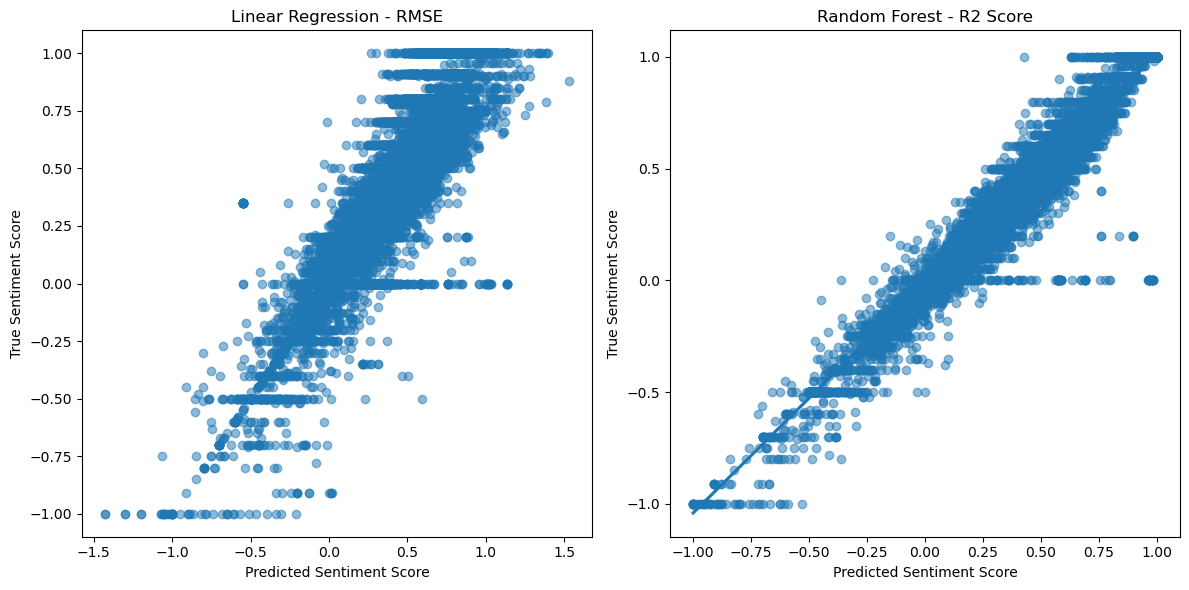

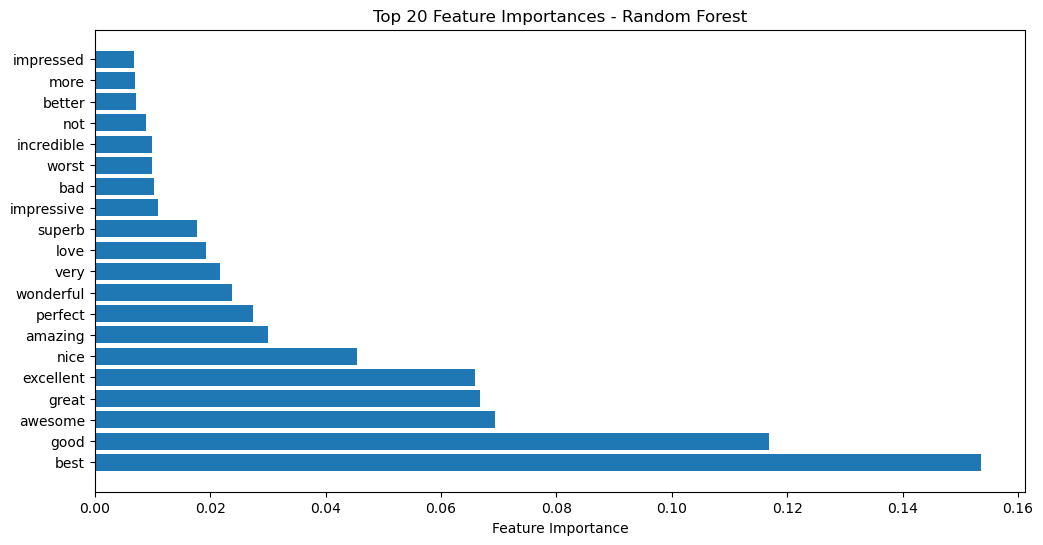

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your feature matrix
# Assuming tfidf is your TF-IDF vectorizer

# ... Your code ...

# Plot RMSE for Linear Regression and Random Forest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Linear Regression - RMSE')
plt.scatter(lr.predict(X), y_true, alpha=0.5)
plt.xlabel('Predicted Sentiment Score')
plt.ylabel('True Sentiment Score')

plt.subplot(1, 2, 2)
plt.title('Random Forest - R2 Score')
sns.regplot(rf.predict(X), y_true, scatter_kws={'alpha':0.5})
plt.xlabel('Predicted Sentiment Score')
plt.ylabel('True Sentiment Score')

plt.tight_layout()
plt.show()

# Plot Feature Importances
plt.figure(figsize=(12, 6))
top_features_importance = [importance for importance, feat_names in top_features]
top_features_names = [feat_names for importance, feat_names in top_features]

plt.barh(top_features_names, top_features_importance)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - Random Forest')
plt.show()


In [11]:
rf_r2

0.9696079334732477

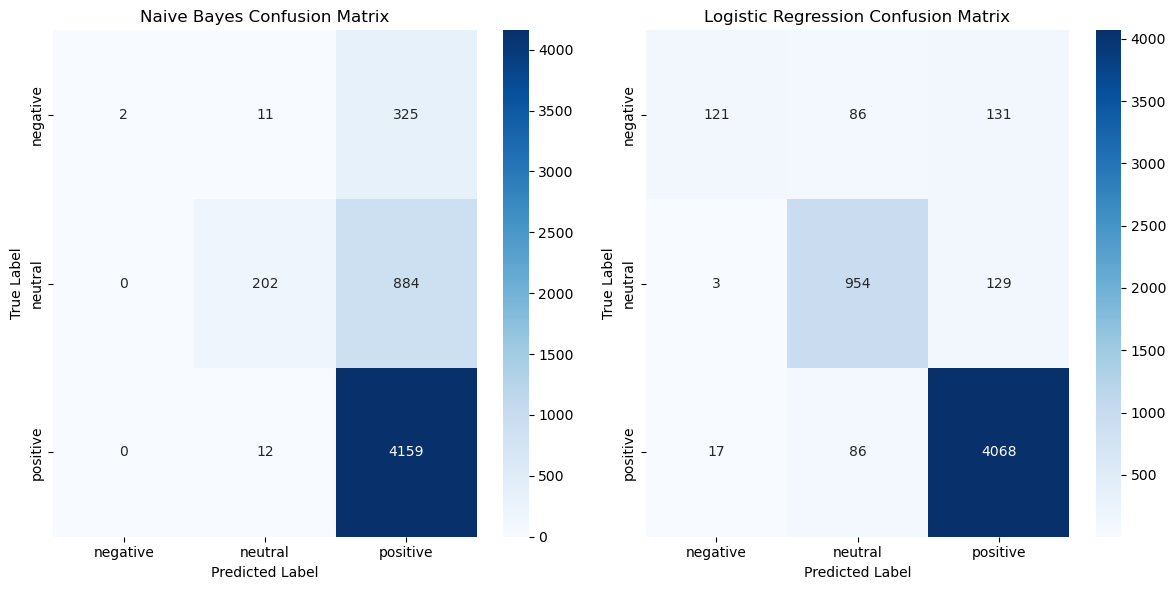

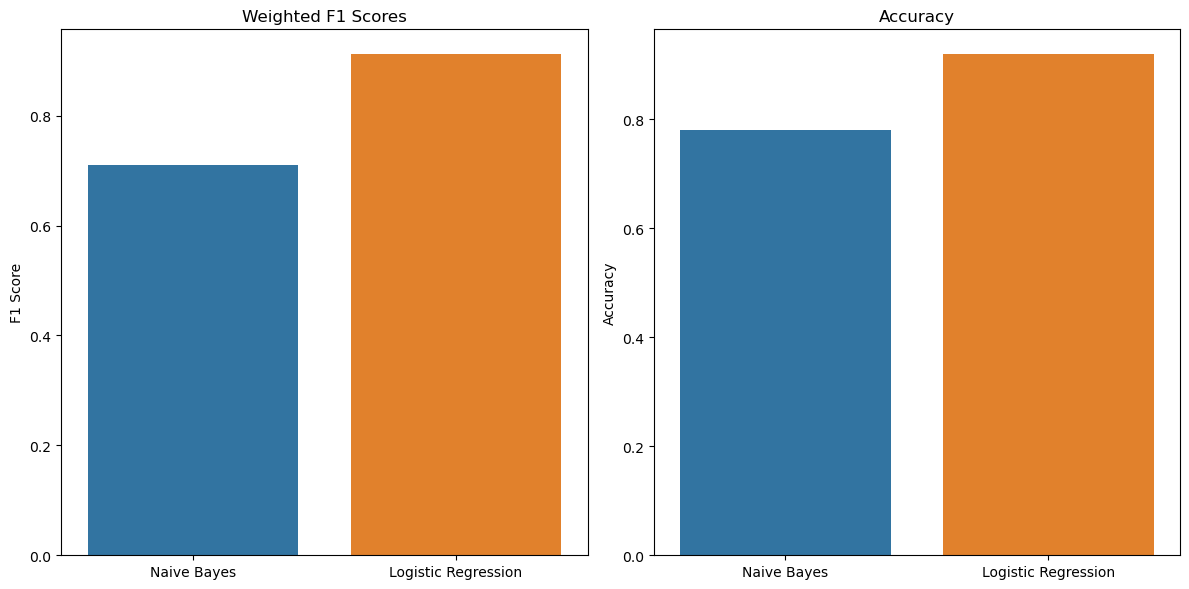

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# Assuming X is your feature matrix
# Assuming df3_con['sentiment_label'] is your categorical target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df3_con['sentiment_label'], test_size=0.2, random_state=42)

nb = MultinomialNB()
logit = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed

# Fit models
nb.fit(X_train, y_train)
logit.fit(X_train, y_train)

# Predictions
nb_preds = nb.predict(X_test)
logit_preds = logit.predict(X_test)

# Calculate F1 scores and accuracy
nb_f1 = f1_score(y_test, nb_preds, average='weighted')
logit_f1 = f1_score(y_test, logit_preds, average='weighted')

nb_accuracy = accuracy_score(y_test, nb_preds)
logit_accuracy = accuracy_score(y_test, logit_preds)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_preds)
logit_cm = confusion_matrix(y_test, logit_preds)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(logit_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Plot F1 Scores and Accuracy
plt.figure(figsize=(12, 6))

models = ['Naive Bayes', 'Logistic Regression']
f1_scores = [nb_f1, logit_f1]
accuracies = [nb_accuracy, logit_accuracy]

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=f1_scores)
plt.title('Weighted F1 Scores')
plt.ylabel('F1 Score')

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix
# Assuming df3_con['sentiment_label'] is your categorical target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df3_con['sentiment_label'], test_size=0.2, random_state=42)

nb = MultinomialNB()
logit = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed

# Fit models
nb.fit(X_train, y_train)
logit.fit(X_train, y_train)

# Evaluate on the test set
nb_f1 = f1_score(y_test, nb.predict(X_test), average='weighted')
logit_f1 = f1_score(y_test, logit.predict(X_test), average='weighted')

nb_accuracy = accuracy_score(y_test, nb.predict(X_test))
logit_accuracy = accuracy_score(y_test, logit.predict(X_test))

print("Naive Bayes Weighted F1 Score:", nb_f1)
print("Logistic Regression Weighted F1 Score:", logit_f1)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", logit_accuracy)


Naive Bayes Weighted F1 Score: 0.7105895599800327
Logistic Regression Weighted F1 Score: 0.9115934837947874
Naive Bayes Accuracy: 0.7798033958891868
Logistic Regression Accuracy: 0.9192135835567471


In [17]:
df_time_sentiment = pd.read_csv('T:\\sem_3\\data driven policy\week 6\\time_sentiment.csv')

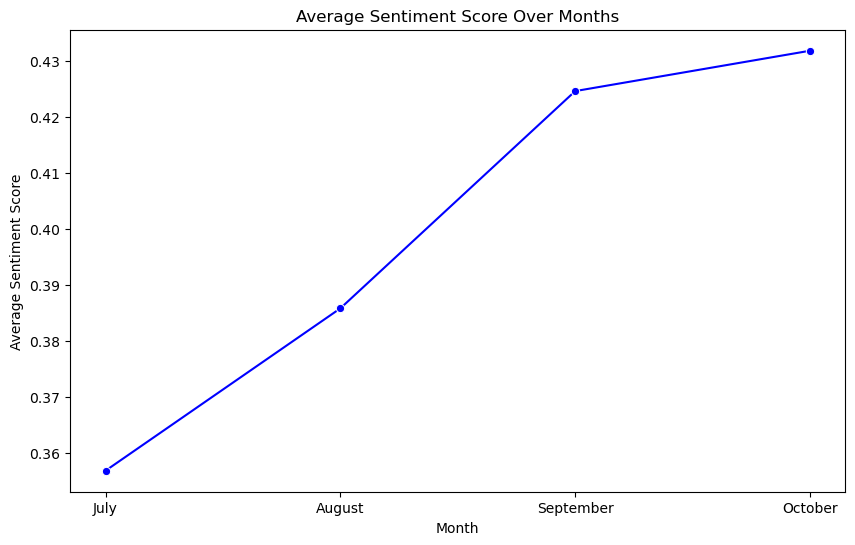

In [23]:
# Convert 'at' column to datetime for sorting months
month_order = ['July', 'August', 'September', 'October']
df_time_sentiment['at'] = pd.Categorical(df_time_sentiment['at'], categories=month_order, ordered=True)

# Group by month and calculate the mean sentiment score
df_agg = df_time_sentiment.groupby('at')['sentiment_score'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='at', y='sentiment_score', data=df_agg, marker='o', color='blue')
plt.title('Average Sentiment Score Over Months')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

### Topic Modelling

In [323]:
df3_con_english['content_clean']

Time
2023-10-14    voice conversations choppy doesnt work anymore...
2023-10-22    the paid version is kind of expensive in my op...
2023-10-12    the voice conversations feature is fantastic b...
2023-10-18    the chatgpt app is absolutely phenomenal its b...
2023-09-21    easily the best app ive ever downloaded highly...
                                    ...                        
2023-07-25                                      everything okay
2023-07-25                                            thank you
2023-07-25                                       first download
2023-07-26                                         first review
2023-07-25                                          finally app
Name: content_clean, Length: 19517, dtype: object

C:\Users\tejas\AppData\Local\Temp\ipykernel_55248\1536997921.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Topic 1:
app: 0.1303
good: 0.0957
best: 0.0830
great: 0.0527
ai: 0.0475
information: 0.0233
useful: 0.0211
application: 0.0204
2021: 0.0174
update: 0.0148

Topic 2:
app: 0.0692
use: 0.0476
chatgpt: 0.0303
nice: 0.0265
easy: 0.0230
thanks: 0.0225
version: 0.0218
useful: 0.0212
fast: 0.0191
android: 0.0162

Topic 3:
app: 0.0713
really: 0.0426
like: 0.0306
just: 0.0286
love: 0.0279
amazing: 0.0193
good: 0.0173
awesome: 0.0170
better: 0.0160
phone: 0.0148

Topic 4:
chatgpt: 0.0517
helpful: 0.0503
app: 0.0290
ai: 0.0265
tool: 0.0204
responses: 0.0183
language: 0.0177
accurate: 0.0109
making: 0.0099
information: 0.0097

Topic 5:
chat: 0.0392
gpt: 0.0301
app: 0.0237
login: 0.0172
google: 0.0164
answer: 0.0134
time: 0.0132
answers: 0.0129
doesnt: 0.0127
account: 0.0119



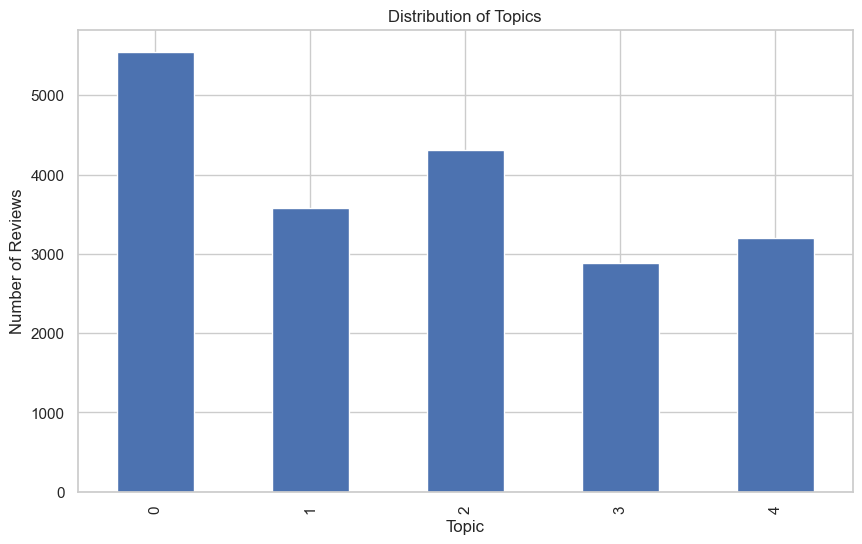

In [324]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Text preprocessing (you can customize this based on your specific needs)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df3_con_english['content_clean'])

# Topic modeling using Latent Dirichlet Allocation (LDA)
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)  # You can adjust the number of topics
topics = lda.fit_transform(X)

# Assign topics to each row in the DataFrame
df3_con_english['topic'] = topics.argmax(axis=1)

# Display the probabilities of words for top words in each topic
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_prob = [topic[i] / topic.sum() for i in top_words_idx]
    
    print(f'Topic {topic_idx + 1}:')
    for word, prob in zip(top_words, top_words_prob):
        print(f'{word}: {prob:.4f}')
    print()


# Visualize the distribution of topics
plt.figure(figsize=(10, 6))
df3_con_english['topic'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text preprocessing (you can customize this based on your specific needs)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df3_con_english['content_clean'])

# Get the feature names and their corresponding TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = pd.DataFrame(X.toarray(), columns=feature_names)

# Calculate the sum of TF-IDF scores for each word across all reviews
total_tfidf_scores = tfidf_scores.sum()

# Get the top words based on the total TF-IDF scores
top_words = total_tfidf_scores.sort_values(ascending=False).index[:10]

# Display the top words and their TF-IDF scores
print("Top Words with TF-IDF Scores:")
for word in top_words:
    tfidf_score = total_tfidf_scores[word]
    print(f"{word}: {tfidf_score:.4f}")


Top Words with TF-IDF Scores:
app: 1657.4734
good: 1125.6595
best: 793.8240
helpful: 663.8298
great: 616.7251
ai: 590.7379
chatgpt: 518.5670
useful: 493.7566
love: 477.6619
really: 408.1801


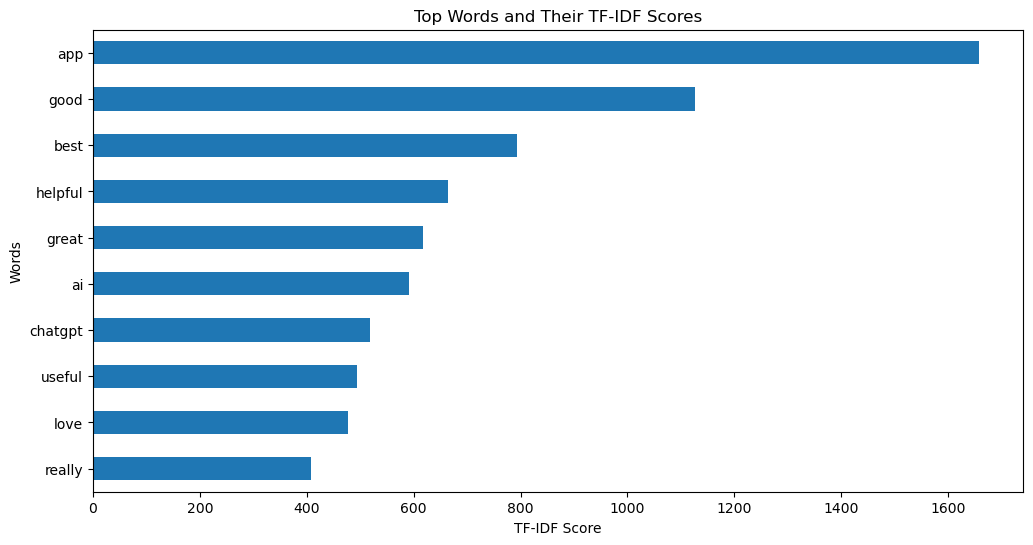

In [44]:
import matplotlib.pyplot as plt

# Plot the top words and their TF-IDF scores
plt.figure(figsize=(12, 6))
total_tfidf_scores[top_words].sort_values().plot(kind='barh')
plt.title('Top Words and Their TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()


In [51]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Assuming df3_con['content_clean'] contains your text data
text_data = df3_con_english['content_clean']

# Function for advanced text cleaning
def advanced_clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the tokens back into a clean text
    clean_text = ' '.join(tokens)
    
    return clean_text

# Apply the advanced cleaning function to the 'content_clean' column
df3_con_english['cleaned_text'] = text_data.apply(advanced_clean_text)

# Display the cleaned DataFrame
print(df3_con_english[['content_clean', 'cleaned_text']].head())

In [60]:
df3_con_english.head()

appVersion          at                                            content  \
0  1.2023.281  10/14/2023  Voice conversations choppy, doesn't work anymo...   
1  1.2023.284  10/22/2023  The paid version is kind of expensive, in my o...   
2  1.2023.263  10/12/2023  The "Voice Conversations" feature is fantastic...   
3  1.2023.284  10/18/2023  The ChatGPT app is absolutely phenomenal! It's...   
4  1.2023.256   9/21/2023  Easily the best app I've ever downloaded. High...   

          repliedAt                            replyContent  \
0  10/18/2023 17:20  Are you still experiencing this issue?   
1               NaN                                     NaN   
2               NaN                                     NaN   
3               NaN                                     NaN   
4               NaN                                     NaN   

  reviewCreatedVersion                              reviewId  score  \
0           1.2023.281  1e702be3-1baf-46a8-9659-7a6ac76bf545      3   
1           1.2023.284  1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5   
2           1.2023.263  e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5   
3           1.2023.284  bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5   
4           1.2023.256  82bedff5-5220-45e7-b89a-65054268c85c      5   

   thumbsUpCount                                          userImage  \
0            138  https://play-lh.googleusercontent.com/a/ACg8oc...   
1             11  https://play-lh.googleusercontent.com/a-/ALV-U...   
2            174  https://play-lh.googleusercontent.com/a-/ALV-U...   
3             67  https://play-lh.googleusercontent.com/a-/ALV-U...   
4            720  https://play-lh.googleusercontent.com/a/ACg8oc...   

         userName                                      content_clean  \
0           Wes A  voice conversations choppy doesnt work anymore...   
1     Bryan Creel  the paid version is kind of expensive in my op...   
2     Matt Larson  the voice conversations feature is fantastic b...   
3  Nathan Telkamp  the chatgpt app is absolutely phenomenal its b...   
4    Alex Ledford  easily the best app ive ever downloaded highly...   

   sentiment_score sentiment_label  topic  \
0             0.28        Positive      2   
1             0.25        Positive      2   
2             0.28        Positive      2   
3             0.19        Positive      3   
4             0.24        Positive      2   

                                        cleaned_text  
0  voice conversation choppy doesnt work anymore ...  
1  paid version kind expensive opinion feel bette...  
2  voice conversation feature fantastic shortcomi...  
3  chatgpt app absolutely phenomenal become indis...  
4  easily best app ive ever downloaded highly imp...

In [61]:
! pip install textstat

In [10]:
import textstat


# Assuming 'text_data' is the name of your DataFrame column containing text
df3_con_english['flesch_reading_ease'] = df3_con_english['content_clean'].apply(textstat.flesch_reading_ease)
df3_con_english['automated_readability_index'] = df3_con_english['content_clean'].apply(textstat.automated_readability_index)
df3_con_english['dale_chall_readability_score'] = df3_con_english['content_clean'].apply(textstat.dale_chall_readability_score)
df3_con_english['difficult_words'] = df3_con_english['content_clean'].apply(textstat.difficult_words)
df3_con_english['reading_time'] = df3_con_english['content_clean'].apply(textstat.reading_time)
df3_con_english['text_standard'] = df3_con_english['content_clean'].apply(textstat.text_standard)

C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\3732914968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english['flesch_reading_ease'] = df3_con_english['content_clean'].apply(textstat.flesch_reading_ease)
C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\3732914968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english['automated_readability_index'] = df3_con_english['content_clean'].apply(textstat.automated_readability_index)
C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\

In [11]:
# Create a mapping for grade levels
grade_mapping = {
    '-5th and -4th grade': -4.5,
    '-4th and -3th grade': -3.5,
    '-3th and -2th grade': -2.5,
    '0th and 1st grade': 0.5,
    '-1th and 0th grade': -0.5,
    '1st and 2nd grade': 1.5,
    '2nd and 3rd grade': 2.5,
    '3rd and 4th grade': 3.5,
    '4th and 5th grade': 4.5,
    '5th and 6th grade': 5.5,
    '6th and 7th grade': 6.5,
    '7th and 8th grade': 7.5,
    '8th and 9th grade': 8.5,
    '9th and 10th grade': 9.5,
    '10th and 11th grade': 10.5,
    '11th and 12th grade': 11.5,
    '12th and 13th grade': 12.5,
    '13th and 14th grade': 13.5,
    '14th and 15th grade': 14.5,
    '15th and 16th grade': 15.5,
    '16th and 17th grade': 16.5,
    '17th and 18th grade': 17.5,
    '18th and 19th grade': 18.5,
    '19th and 20th grade': 19.5,
    '20th and 21st grade': 20.5,
    '21st and 22nd grade': 21.5,
    '22nd and 23rd grade': 22.5,
    '23rd and 24th grade': 23.5,
    '24th and 25th grade': 24.5,
    '25th and 26th grade': 25.5,
    '26th and 27th grade': 26.5,
    '27th and 28th grade': 27.5,
    '28th and 29th grade': 28.5,
    '29th and 30th grade': 29.5,
    '30th and 31st grade': 30.5,
    '31st and 32nd grade': 31.5,
    '32nd and 33rd grade': 32.5,
    '33rd and 34th grade': 33.5,
    '34th and 35th grade': 34.5,
    '35th and 36th grade': 35.5,
    '36th and 37th grade': 36.5,
    '37th and 38th grade': 37.5,
    '43rd and 44th grade': 43.5,
    '102nd and 103rd grade': 102.5,
}

df3_con_english['text_standard'] = df3_con_english['text_standard'].map(grade_mapping)


C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\174792520.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english['text_standard'] = df3_con_english['text_standard'].map(grade_mapping)


In [69]:
df3_con_english.to_csv('chatgpt_1_read.csv')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with the specified columns
columns_to_pca = ['flesch_reading_ease', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'reading_time', 'text_standard']

# Extract the specified columns
data_for_pca = df3_con_english[columns_to_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Apply PCA
n_components = 3  # Choose the number of principal components you want
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([df3_con_english, pca_df], axis=1)

# Display the result
result_df


In [13]:
import numpy as np
df3_con_english['version_category'] = np.where(df3_con_english['appVersion'].str.contains('^1\.0'), '0', '2023')

C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\606810225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english['version_category'] = np.where(df3_con_english['appVersion'].str.contains('^1\.0'), '0', '2023')


In [14]:
df3_con_english['version_category']

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
27946       0
27948       0
27949       0
27951       0
27953       0
Name: version_category, Length: 19522, dtype: object

In [99]:
import plotly.express as px

fig = px.scatter_matrix(
    
    df3_con_english,
    dimensions=columns_to_pca,
    color=df3_con_english['score']
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: name 'plt' is not defined

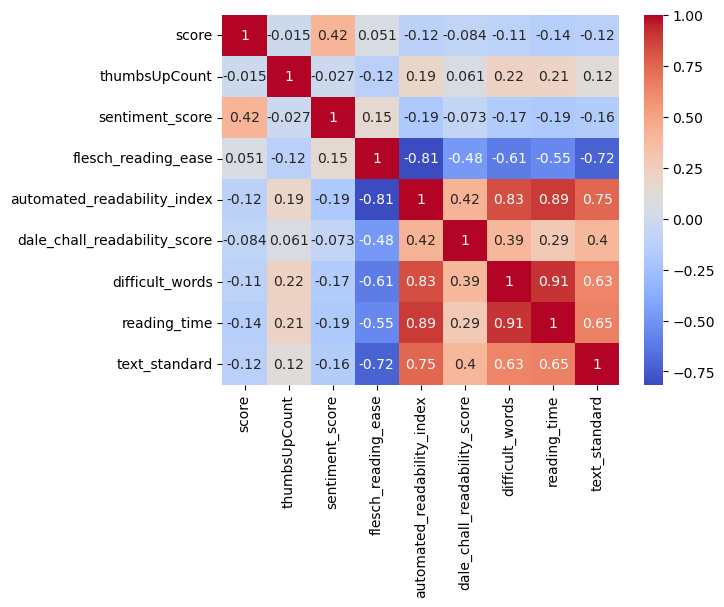

In [16]:
import seaborn as sns

corr_matrix = df3_con_english.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [217]:
import plotly.express as px

# Assuming df3_con_english is your DataFrame
fig = px.histogram(df3_con_english, x='score', nbins=10, title='Histogram of Rating', category_orders={'score': list(range(1, 6))}, template='plotly_dark')

# Customize the appearance
fig.update_layout(
    bargap=0.05,    # Adjust the gap between bars (0.05 is just an example, you can adjust this value to decrease bar width)
    width=800,      # Set the width of the figure
    height=400     # Set the height of the figure
)

fig.update_xaxes(title='Rating')  # Rename the x-axis as "Rating"

fig.update_traces(marker=dict(line=dict(color='white', width=1)))  # Add white borders to the bars for better separation

# Show the figure
fig.show()


In [325]:
import plotly.express as px

# Assuming df3_con_english is your DataFrame
fig = px.histogram(df3_con_english, x='topic', nbins=10, title='Histogram of Rating', category_orders={'topic': list(range(1, 6))}, template='plotly_dark')

# Customize the appearance
fig.update_layout(
    bargap=0.05,    # Adjust the gap between bars (0.05 is just an example, you can adjust this value to decrease bar width)
    width=800,      # Set the width of the figure
    height=400     # Set the height of the figure
)

fig.update_xaxes(title='topic')  # Rename the x-axis as "Rating"

fig.update_traces(marker=dict(line=dict(color='white', width=1)))  # Add white borders to the bars for better separation

# Show the figure
fig.show()


In [249]:
# Assuming df3_con_english is your DataFrame
fig1 = px.histogram(df3_con_english, x='version_category', nbins=5, title='Histogram of Version')

# Customize the appearance
fig1.update_layout(
    bargroupgap=0.6,
    width=800,    # Set the width of the figure
    height=400    # Set the height of the figure
)

fig1.update_traces(marker=dict(line=dict(color='white', width=1)))  # Add white borders to the bars for better separation

# Show the figure
fig1.show()


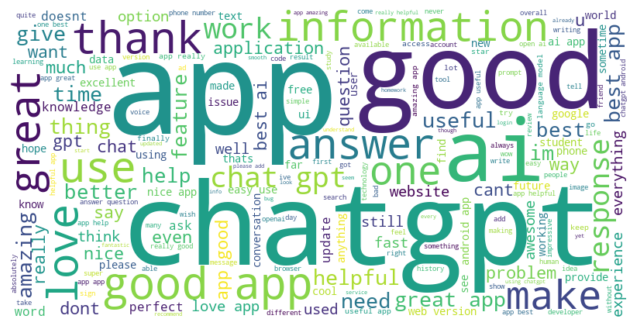

In [107]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(df3_con_english['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [115]:
df3_con_english

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27946    1.0.0016   7/25/2023   
27948    1.0.0016   7/25/2023   
27949    1.0.0016   7/25/2023   
27951    1.0.0016   7/26/2023   
27953    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27946                                    Everything okay               NaN   
27948                                          Thank you               NaN   
27949                                     First download               NaN   
27951                                       First review               NaN   
27953                                        Finally App               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27946                                     NaN             1.0.0016   
27948                                     NaN             1.0.0016   
27949                                     NaN             1.0.0016   
27951                                     NaN             1.0.0016   
27953                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27946  db310dc6-396e-4f5a-aa9a-77fb14c74a8c      5              0   
27948  66614e55-6770-4a53-af9e-4ee47aa68d28      5              0   
27949  14f1bffe-d903-4754-a351-548a45e4a119      5              0   
27951  824ca6d6-facd-4ced-aeb4-17fa0eca1814      5              0   
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   

                                               userImage  ... sentiment_label  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...  ...        Positive   
1      https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
2      https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
3      https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
4      https://play-lh.googleusercontent.com/a/ACg8oc...  ...        Positive   
...                                                  ...  ...             ...   
27946  https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
27948  https://play-lh.googleusercontent.com/a-/ALV-U...  ...         Neutral   
27949  https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
27951  https://play-lh.googleusercontent.com/a-/ALV-U...  ...        Positive   
27953  https://play-lh.googleusercontent.com/a-/ALV-U...  ...         Neutral   

      topic                   

In [119]:
import plotly.express as px

fig2 = px.scatter(df3_con_english, x='thumbsUpCount', y='sentiment_label', color='sentiment_label', title='Sentiment Analysis')
fig2.show()


In [268]:
from scipy.stats import spearmanr

# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
df3_con_english['polarity'] = df3_con_english['sentiment_label'].map(sentiment_mapping)

# Calculate the Spearman correlation
correlation_matrix, p_values = spearmanr(df3_con_english[['thumbsUpCount', 'polarity']])

# Print the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)


Spearman Correlation Matrix:
-0.02856562825449009


C:\Users\tejas\AppData\Local\Temp\ipykernel_55248\3403703145.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
df_time_sentiment = pd.read_csv("time_sentiment.csv")
df_time_sentiment.head()

at  sentiment_score
0  July             0.18
1  July             0.28
2  July             0.09
3  July             0.36
4  July             0.31

In [311]:
# Map month names to numerical values
month_mapping = {'July': 1, 'August': 2, 'September': 3, 'October': 4}
df_time_sentiment['month_numeric'] = df_time_sentiment['at'].map(month_mapping)

# Calculate the Spearman correlation
correlation, p_value = spearmanr(df_time_sentiment['month_numeric'], df_time_sentiment['sentiment_score'])

# Print the Spearman correlation coefficient and p-value
print(f"Spearman Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Spearman Correlation Coefficient: 0.08
P-value: 0.0000


In [316]:
correlation_matrix1 = np.corrcoef(df_time_sentiment['month_numeric'], df_time_sentiment['sentiment_score'])
# Extract the correlation coefficient and p-value
correlation_coefficient1 = correlation_matrix1[0, 1]
p_value1 = correlation_matrix1[0, 1]

# Interpret results
print(f"Pearson Correlation Coefficient: {correlation_coefficient1:.2f}")
print(f"P-Value: {p_value1}")

Pearson Correlation Coefficient: 0.08
P-Value: 0.08032986916297707


Pearson Correlation Coefficient: 0.08
P-Value: 0.08032986916297707


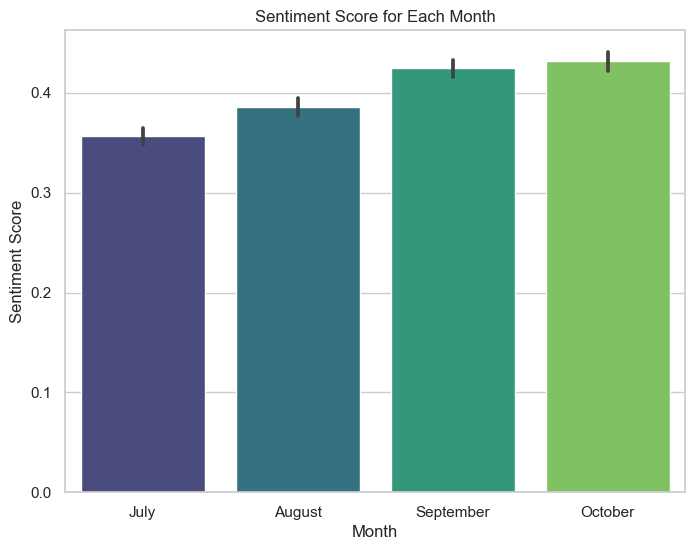

In [312]:
# Choose variables
# Compute Pearson correlation
correlation_matrix = np.corrcoef(df_time_sentiment['sentiment_score'], df_time_sentiment['month_numeric'])

# Extract the correlation coefficient and p-value
correlation_coefficient = correlation_matrix[0, 1]
p_value = correlation_matrix[0, 1]

# Interpret results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value}")

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='at', y='sentiment_score', data=df_time_sentiment, palette='viridis')
plt.title('Sentiment Score for Each Month')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.show()

In [273]:
from scipy.stats import pointbiserialr

df3_con_english['version_category'] = df3_con_english['version_category'].astype(int)
# Calculate the Point-Biserial Correlation
correlation, p_value = pointbiserialr(df3_con_english['version_category'], df3_con_english['sentiment_score'])

# Print the Point-Biserial Correlation and p-value
print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Point-Biserial Correlation: 0.07
P-value: 0.0000


C:\Users\tejas\AppData\Local\Temp\ipykernel_55248\2513305213.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:
from scipy.stats import pearsonr


correlation, p_value = pearsonr(df3_con_english['score'], df3_con_english['sentiment_score'])

# Print the Pearson correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.42
P-value: 0.0000


In [257]:
df3_con_english

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27946    1.0.0016   7/25/2023   
27948    1.0.0016   7/25/2023   
27949    1.0.0016   7/25/2023   
27951    1.0.0016   7/26/2023   
27953    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27946                                    Everything okay               NaN   
27948                                          Thank you               NaN   
27949                                     First download               NaN   
27951                                       First review               NaN   
27953                                        Finally App               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27946                                     NaN             1.0.0016   
27948                                     NaN             1.0.0016   
27949                                     NaN             1.0.0016   
27951                                     NaN             1.0.0016   
27953                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27946  db310dc6-396e-4f5a-aa9a-77fb14c74a8c      5              0   
27948  66614e55-6770-4a53-af9e-4ee47aa68d28      5              0   
27949  14f1bffe-d903-4754-a351-548a45e4a119      5              0   
27951  824ca6d6-facd-4ced-aeb4-17fa0eca1814      5              0   
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   

                                               userImage          userName  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...             Wes A   
1      https://play-lh.googleusercontent.com/a-/ALV-U...       Bryan Creel   
2      https://play-lh.googleusercontent.com/a-/ALV-U...       Matt Larson   
3      https://play-lh.googleusercontent.com/a-/ALV-U...    Nathan Telkamp   
4      https://play-lh.googleusercontent.com/a/ACg8oc...      Alex Ledford   
...                                                  ...               ...   
27946  https://play-lh.googleusercontent.com/a-/ALV-U...   Soumen Karmakar   
27948  https://play-lh.googleusercontent.com/a-/ALV-U...  suresh kotaprolu   
27949  https://play-lh.googleusercontent.com/a-/ALV-U...    Vikash Jaiswal   
27951  https://play-lh.googleusercontent.com/a-/ALV-U...      Parth Sarthi   
27953  https://play-lh.googleusercontent.com/a-/ALV-U...      Laijul Karim   

                                           content_clean  sentimen

In [254]:
df3_con_english['polarity']

0        1
1        1
2        1
3        1
4        1
        ..
27946    1
27948    0
27949    1
27951    1
27953    0
Name: polarity, Length: 19517, dtype: int64

In [ ]:
! pip install pingouin
! pip install py-agree


In [152]:
import pingouin as pg

# Assume df is your DataFrame with the relevant columns
text_features = df3_con_english[['score', 'sentiment_score']]

# Calculate Cronbach's Alpha
alpha, items = pg.cronbach_alpha(text_features)

print(f"Cronbach's Alpha: {alpha}")
print("Item scores:")
print(items)

Cronbach's Alpha: 0.359558122296467
Item scores:
[0.341 0.377]


In [ ]:
import krippendorff

# Assuming 'sentiment_label' is the column with categorical data
data = df3_con_english['sentiment_label']

# Calculate Krippendorff's Alpha
alpha = krippendorff.alpha(data)

print(f"Krippendorff's Alpha: {alpha}")


In [164]:
! pip install krippendorff

In [286]:
df3_con_english

appVersion          at  \
0      1.2023.281  10/14/2023   
1      1.2023.284  10/22/2023   
2      1.2023.263  10/12/2023   
3      1.2023.284  10/18/2023   
4      1.2023.256   9/21/2023   
...           ...         ...   
27946    1.0.0016   7/25/2023   
27948    1.0.0016   7/25/2023   
27949    1.0.0016   7/25/2023   
27951    1.0.0016   7/26/2023   
27953    1.0.0016   7/25/2023   

                                                 content         repliedAt  \
0      Voice conversations choppy, doesn't work anymo...  10/18/2023 17:20   
1      The paid version is kind of expensive, in my o...               NaN   
2      The "Voice Conversations" feature is fantastic...               NaN   
3      The ChatGPT app is absolutely phenomenal! It's...               NaN   
4      Easily the best app I've ever downloaded. High...               NaN   
...                                                  ...               ...   
27946                                    Everything okay               NaN   
27948                                          Thank you               NaN   
27949                                     First download               NaN   
27951                                       First review               NaN   
27953                                        Finally App               NaN   

                                 replyContent reviewCreatedVersion  \
0      Are you still experiencing this issue?           1.2023.281   
1                                         NaN           1.2023.284   
2                                         NaN           1.2023.263   
3                                         NaN           1.2023.284   
4                                         NaN           1.2023.256   
...                                       ...                  ...   
27946                                     NaN             1.0.0016   
27948                                     NaN             1.0.0016   
27949                                     NaN             1.0.0016   
27951                                     NaN             1.0.0016   
27953                                     NaN             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
0      1e702be3-1baf-46a8-9659-7a6ac76bf545      3            138   
1      1d3d5032-b5a0-46bd-8b17-ad25f1457f3b      5             11   
2      e0b2c4c3-1264-4d90-89cf-92db4ca33b08      5            174   
3      bd5c7a38-b9ab-4ab2-ab45-98041f43b1c1      5             67   
4      82bedff5-5220-45e7-b89a-65054268c85c      5            720   
...                                     ...    ...            ...   
27946  db310dc6-396e-4f5a-aa9a-77fb14c74a8c      5              0   
27948  66614e55-6770-4a53-af9e-4ee47aa68d28      5              0   
27949  14f1bffe-d903-4754-a351-548a45e4a119      5              0   
27951  824ca6d6-facd-4ced-aeb4-17fa0eca1814      5              0   
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   

                                               userImage  ... sentiment_score  \
0      https://play-lh.googleusercontent.com/a/ACg8oc...  ...            0.28   
1      https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.25   
2      https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.28   
3      https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.19   
4      https://play-lh.googleusercontent.com/a/ACg8oc...  ...            0.24   
...                                                  ...  ...             ...   
27946  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.50   
27948  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   
27949  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.25   
27951  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.25   
27953  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   

      sentiment_label  version

In [294]:
df_time_sentiment['at']

0           July
1           July
2           July
3           July
4           July
          ...   
27971    October
27972    October
27973    October
27974    October
27975    October
Name: at, Length: 27976, dtype: object

In [328]:
month_order 

at  sentiment_score  month_numeric
0         July             0.18              1
1         July             0.28              1
2         July             0.09              1
3         July             0.36              1
4         July             0.31              1
...        ...              ...            ...
27971  October             0.80              4
27972  October             0.70              4
27973  October             0.70              4
27974  October             0.60              4
27975  October             0.70              4

[27976 rows x 3 columns]

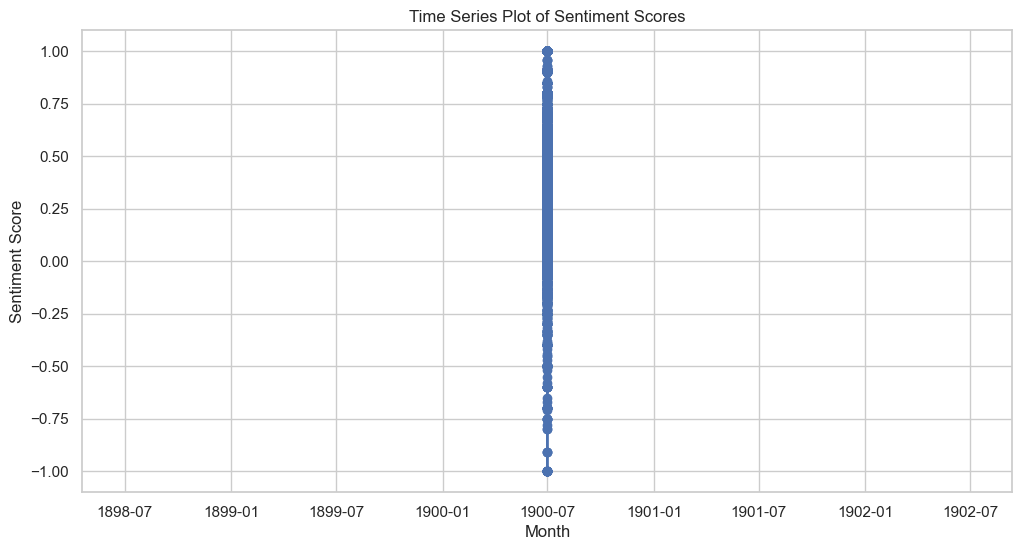

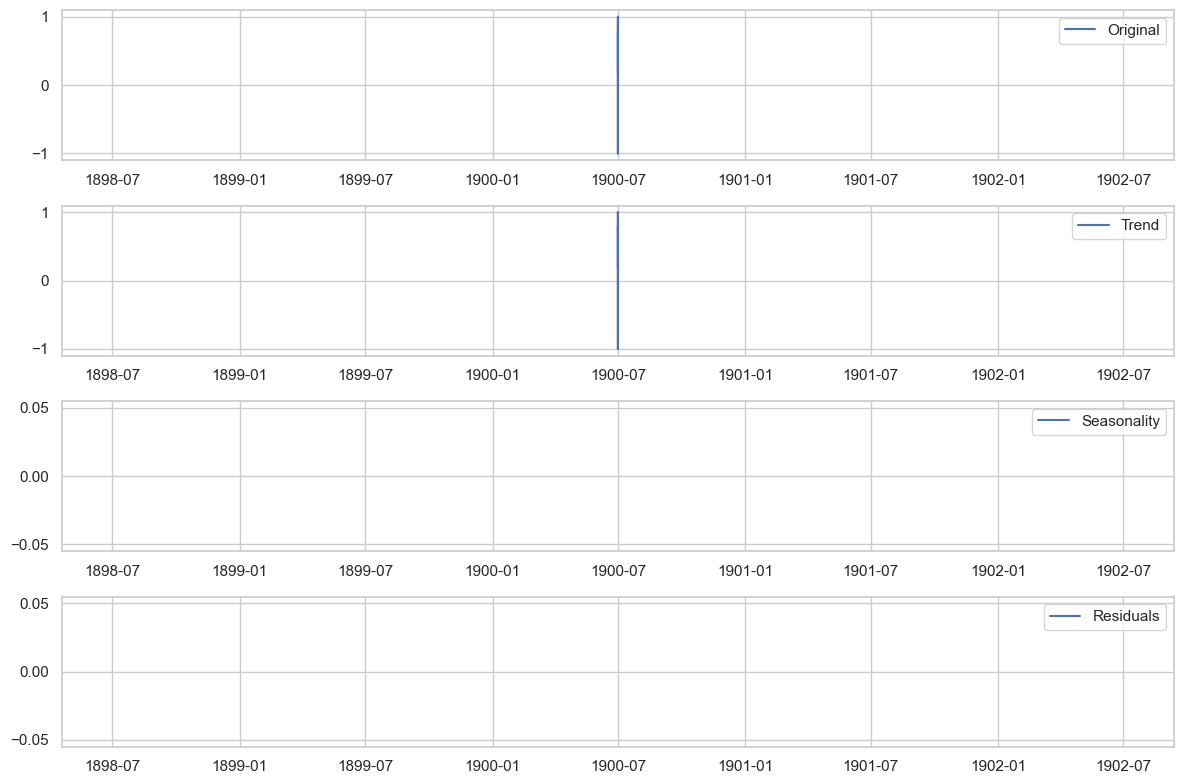

In [329]:
import statsmodels.api as sm

df_july = df_time_sentiment[df_time_sentiment['at'] == 'July']

# Create a time-based DataFrame with a DatetimeIndex
df_time_series = pd.DataFrame({'sentiment_score': df_july['sentiment_score'].values},
                               index=pd.to_datetime(df_july['at'], format='%B'))

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['sentiment_score'], marker='o')
plt.title('Time Series Plot of Sentiment Scores')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.show()

# Decompose the time series into trend, seasonality, and residual components
decomposition = sm.tsa.seasonal_decompose(df_time_series['sentiment_score'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_time_series['sentiment_score'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Convert the 'date_column' to datetime format
df3_con_english['date'] = pd.to_datetime(df3_con_english['at'], format='%m/%d/%Y')

# Sort the DataFrame by date
df3_con_english = df3_con_english.sort_values(by='date')

C:\Users\tejas\AppData\Local\Temp\ipykernel_56992\3300634554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_con_english['date'] = pd.to_datetime(df3_con_english['at'], format='%m/%d/%Y')


In [22]:
df3_con_english

appVersion          at  \
27953    1.0.0016   7/25/2023   
17580    1.0.0016   7/25/2023   
5786     1.0.0016   7/25/2023   
17579    1.0.0016   7/25/2023   
5794     1.0.0016   7/25/2023   
...           ...         ...   
19347  1.2023.285  10/29/2023   
19293  1.2023.285  10/29/2023   
19349  1.2023.285  10/29/2023   
19342  1.2023.285  10/29/2023   
19634  1.2023.284  10/29/2023   

                                                 content       repliedAt  \
27953                                        Finally App             NaN   
17580                  This this next level friend to me             NaN   
5786   It's amazing 😍 But issue is , Text paragraph f...             NaN   
17579  First review a am so happy 😊 Thi app is worded...             NaN   
5794   Good UI, somehow feels bit faster on app. But ...  9/6/2023 12:40   
...                                                  ...             ...   
19347  very very much useful app to all students ☺️ T...             NaN   
19293  Voice recognition doesnt work for me. I have t...             NaN   
19349  most helpful app for students, thankyou chatgp...             NaN   
19342  great app but I wish I could produce pictures ...             NaN   
19634                                 man it's very cool             NaN   

                                            replyContent reviewCreatedVersion  \
27953                                                NaN             1.0.0016   
17580                                                NaN             1.0.0016   
5786                                                 NaN             1.0.0016   
17579                                                NaN             1.0.0016   
5794   Thanks for your feedback on the issue with dar...             1.0.0016   
...                                                  ...                  ...   
19347                                                NaN           1.2023.285   
19293                                                NaN           1.2023.285   
19349                                                NaN           1.2023.285   
19342                                                NaN           1.2023.285   
19634                                                NaN           1.2023.284   

                                   reviewId  score  thumbsUpCount  \
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   
17580  71c9025f-3497-428f-b79e-e2e2737e3cb9      5              0   
5786   991296fe-5dc4-4264-932f-6501a77df1f7      4              0   
17579  fa095329-27ec-461d-b4b8-bd6949a60909      5              0   
5794   60c3b959-14d7-4d86-82ce-e0986c9bee5e      3              0   
...                                     ...    ...            ...   
19347  a583103a-fb82-4fb4-85d9-7f36ae966b79      5              0   
19293  a53aa455-7238-4c71-ba5c-f3a400bb2933      4              0   
19349  7c08fe63-82ea-4e68-9ad2-fb58790e34d2      5              0   
19342  253c1a9f-169e-4000-8ccd-672ef990fbce      4              0   
19634  e7593309-9b13-4741-af66-b3d7159c6892      5              0   

                                               userImage  ... sentiment_score  \
27953  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   
17580  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   
5786   https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.30   
17579  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.47   
5794   https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.27   
...                                                  ...  ...             ...   
19347  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.25   
19293  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.27   
19349  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.25   
19342  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.80   
1963

In [26]:
df3_con_english.head()

appVersion         at  \
27953   1.0.0016  7/25/2023   
17580   1.0.0016  7/25/2023   
5786    1.0.0016  7/25/2023   
17579   1.0.0016  7/25/2023   
5794    1.0.0016  7/25/2023   

                                                 content       repliedAt  \
27953                                        Finally App             NaN   
17580                  This this next level friend to me             NaN   
5786   It's amazing 😍 But issue is , Text paragraph f...             NaN   
17579  First review a am so happy 😊 Thi app is worded...             NaN   
5794   Good UI, somehow feels bit faster on app. But ...  9/6/2023 12:40   

                                            replyContent reviewCreatedVersion  \
27953                                                NaN             1.0.0016   
17580                                                NaN             1.0.0016   
5786                                                 NaN             1.0.0016   
17579                                                NaN             1.0.0016   
5794   Thanks for your feedback on the issue with dar...             1.0.0016   

                                   reviewId  score  thumbsUpCount  \
27953  822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0   
17580  71c9025f-3497-428f-b79e-e2e2737e3cb9      5              0   
5786   991296fe-5dc4-4264-932f-6501a77df1f7      4              0   
17579  fa095329-27ec-461d-b4b8-bd6949a60909      5              0   
5794   60c3b959-14d7-4d86-82ce-e0986c9bee5e      3              0   

                                               userImage  ... sentiment_score  \
27953  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   
17580  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.00   
5786   https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.30   
17579  https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.47   
5794   https://play-lh.googleusercontent.com/a-/ALV-U...  ...            0.27   

      sentiment_label  flesch_reading_ease automated_readability_index  \
27953         Neutral                35.61                         3.1   
17580         Neutral               106.67                         0.3   
5786         Positive                57.61                        10.5   
17579        Positive                85.69                         4.6   
5794         Positive                72.16                         8.9   

       dale_chall_readability_score  difficult_words  reading_time  \
27953                         11.63                0          0.15   
17580                          0.35                0          0.40   
5786                          10.47                7          1.44   
17579                          8.49                1          0.71   
5794                          11.34                2          1.12   

       text_standard  version_category       date  
27953            0.5                 0 2023-07-25  
17580           -0.5                 0 2023-07-25  
5786            10.5                 0 2023-07-25  
17579            3.5                 0 2023-07-25  
5794             8.5                 0 2023-07-25  

[5 rows x 22 columns]

In [32]:
# Create separate 'month' and 'day' columns
df3_con_english['Month'] = df3_con_english['date'].dt.month_name()
df3_con_english['Day'] = df3_con_english['date'].dt.day
df3_con_english['Year'] = df3_con_english['date'].dt.year

In [11]:
import matplotlib.pyplot as plt

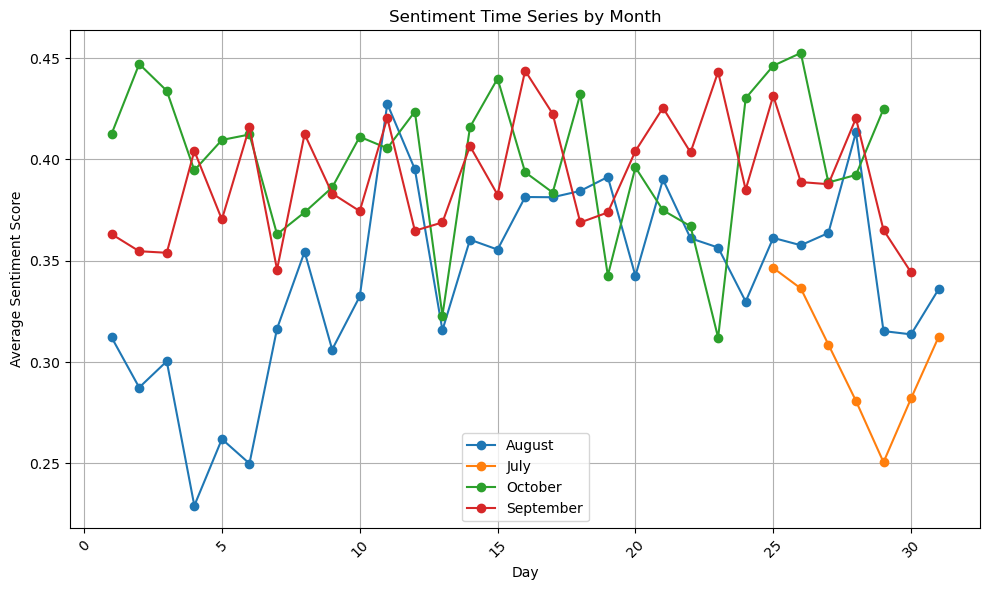

In [33]:
# Group by month, day, and year and calculate the average sentiment score
df_grouped_month_day_year = df3_con_english.groupby(['Month', 'Day', 'Year'])['sentiment_score'].mean().reset_index()

# Plotting the time series graph
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month in df_grouped_month_day_year['Month'].unique():
    month_data = df_grouped_month_day_year[df_grouped_month_day_year['Month'] == month]
    plt.plot(month_data['Day'], month_data['sentiment_score'], marker='o', label=f'{month}')

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df3_con_english.to_csv('chatgpt_1_read_1.csv')

In [ ]:
# Choose variables
# Compute Pearson correlation
correlation_matrix = np.corrcoef(df_time_sentiment['sentiment_score'], df_time_sentiment['month_numeric'])

# Extract the correlation coefficient and p-value
correlation_coefficient = correlation_matrix[0, 1]
p_value = correlation_matrix[0, 1]

# Interpret results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value}")

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='at', y='sentiment_score', data=df_time_sentiment, palette='viridis')
plt.title('Sentiment Score for Each Month')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.show()

In [2]:
import cv2
cv2.__version__

'4.8.1'

In [3]:
print(cv2.__file__)

t:\Anaconda\lib\site-packages\cv2\__init__.py


### Plotting individual graph for each month based on randomly selected rows

In [ ]:
import pandas as pd
data_1 = pd.read_csv('chatgpt_1_read_1.csv')
data_1

In [25]:
# Assuming df is your DataFrame and 'date_column' is the column containing dates
data_1['date_column'] = pd.to_datetime(data_1['date'])

# Create a new column 'day_of_week' with the day names
data_1['day_of_week'] = data_1['date_column'].dt.strftime('%A')

In [125]:
data_1.to_csv('day_chatgpt.csv')

In [28]:
data_1['day_of_week']

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
19517     Sunday
19518     Sunday
19519     Sunday
19520     Sunday
19521     Sunday
Name: day_of_week, Length: 19522, dtype: object

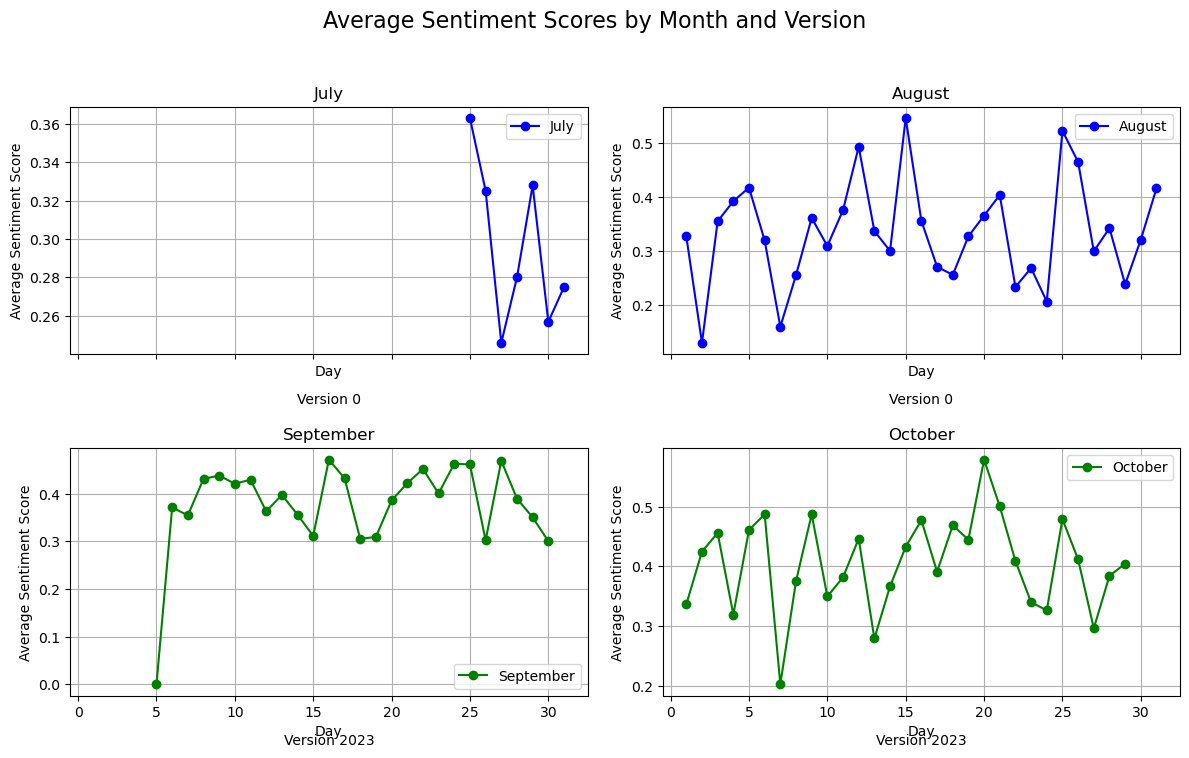

In [23]:
# Step 1: Filter rows with version 0 and month July
data_july = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'July')]
data_august = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'August')]
data_sept = data_1[(data_1['version_category'] == 2023) & (data_1['Month'] == 'September')]
data_oct = data_1[(data_1['version_category'] == 2023) & (data_1['Month'] == 'October')]

# Step 2: Get a random sample of 650 rows
random_sample_july = data_july.sample(n=650, random_state=42)  # You can change the random_state
random_sample_august = data_august.sample(n=650, random_state=42)  # You can change the random_state
random_sample_sept = data_sept.sample(n=650, random_state=42)  # You can change the random_state
random_sample_oct = data_oct.sample(n=650, random_state=42)  # You can change the random_state

# Display the resulting DataFrame
# Step 2: Calculate the average sentiment score for each day
avg_sentiment_july = random_sample_july.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_august = random_sample_august.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_sept = random_sample_sept.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_oct = random_sample_oct.groupby('Day')['sentiment_score'].mean().reset_index()

# Plotting the time series graph
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Plot average sentiment score for each day in separate subplots
axs[0, 0].plot(avg_sentiment_july['Day'], avg_sentiment_july['sentiment_score'], marker='o', label='July', color='blue')
axs[0, 0].set_title('July')
axs[0, 0].text(0.5, -0.2, 'Version 0', size=10, ha="center", transform=axs[0, 0].transAxes)

axs[0, 1].plot(avg_sentiment_august['Day'], avg_sentiment_august['sentiment_score'], marker='o', label='August', color='blue')
axs[0, 1].set_title('August')
axs[0, 1].text(0.5, -0.2, 'Version 0', size=10, ha="center", transform=axs[0, 1].transAxes)

axs[1, 0].plot(avg_sentiment_sept['Day'], avg_sentiment_sept['sentiment_score'], marker='o', label='September', color='green')
axs[1, 0].set_title('September')
axs[1, 0].text(0.5, -0.2, 'Version 2023', size=10, ha="center", transform=axs[1, 0].transAxes)

axs[1, 1].plot(avg_sentiment_oct['Day'], avg_sentiment_oct['sentiment_score'], marker='o', label='October', color='green')
axs[1, 1].set_title('October')
axs[1, 1].text(0.5, -0.2, 'Version 2023', size=10, ha="center", transform=axs[1, 1].transAxes)

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Day', ylabel='Average Sentiment Score')
    ax.legend()
    ax.grid(True)

plt.suptitle('Average Sentiment Scores by Month and Version', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [31]:
random_sample_july.head()

Unnamed: 0 appVersion         at  \
1878       27769   1.0.0016  7/25/2023   
5034         935   1.0.0023  7/31/2023   
3752        6082   1.0.0023  7/27/2023   
4184       16864   1.0.0022  7/28/2023   
555        19081   1.0.0016  7/25/2023   

                                                content repliedAt  \
1878                                          Finally!!       NaN   
5034  Good, but as a PLUS subscriber there doesn't a...       NaN   
3752  Really impressed with the performance of this ...       NaN   
4184      This app needs to be develop.It does not work       NaN   
555                            First review Thank you 😁       NaN   

     replyContent reviewCreatedVersion                              reviewId  \
1878          NaN             1.0.0016  369834ac-b52a-4d60-a539-1dedc043427f   
5034          NaN             1.0.0023  a0aab607-4345-435c-9e99-aaee3463dd65   
3752          NaN             1.0.0023  e96d3606-c9b5-4065-9585-bf1b5cbbf749   
4184          NaN             1.0.0022  a7be1c7c-d891-44fd-a2bc-236e1e09028a   
555           NaN             1.0.0016  2a9989ab-cf2c-4457-aef0-fa313e13fd55   

      score  thumbsUpCount  ... automated_readability_index  \
1878      5              0  ...                        12.0   
5034      4              8  ...                        41.4   
3752      5              0  ...                        10.9   
4184      1              0  ...                         1.9   
555       5              0  ...                         4.1   

     dale_chall_readability_score difficult_words  reading_time text_standard  \
1878                         0.05               0          0.10          -0.5   
5034                        11.94              15          5.33          -0.5   
3752                         9.57               3          1.35           9.5   
4184                         9.35               1          0.53           4.5   
555                          0.20               0          0.29           1.5   

      version_category       date  Month  Day  Year  
1878                 0  7/25/2023   July   25  2023  
5034                 0  7/31/2023   July   31  2023  
3752                 0  7/27/2023   July   27  2023  
4184                 0  7/28/2023   July   28  2023  
555                  0  7/25/2023   July   25  2023  

[5 rows x 26 columns]

In [32]:
# Step 1: Filter rows with version 0 and month July
data_july = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'July')]
data_august = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'August')]
data_sept = data_1[(data_1['version_category'] == 2023) & (data_1['Month'] == 'September')]
data_oct = data_1[(data_1['version_category'] == 2023) & (data_1['Month'] == 'October')]

# Step 2: Get a random sample of 650 rows
random_sample_july = data_july.sample(n=650, random_state=42)  # You can change the random_state
random_sample_august = data_august.sample(n=650, random_state=42)  # You can change the random_state
random_sample_sept = data_sept.sample(n=650, random_state=42)  # You can change the random_state
random_sample_oct = data_oct.sample(n=650, random_state=42)

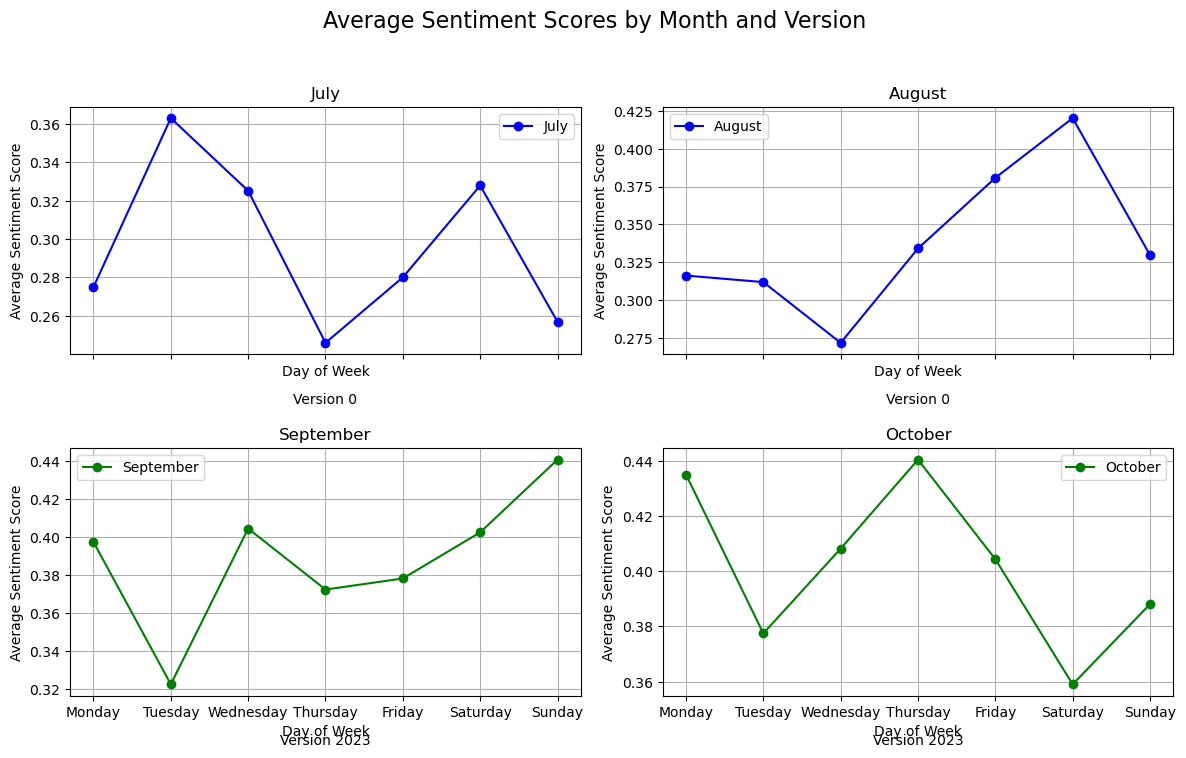

In [34]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Step 2: Calculate the average sentiment score for each day
avg_sentiment_july_day = random_sample_july.groupby('day_of_week')['sentiment_score'].mean().reset_index()
avg_sentiment_august_day = random_sample_august.groupby('day_of_week')['sentiment_score'].mean().reset_index()
avg_sentiment_sept_day = random_sample_sept.groupby('day_of_week')['sentiment_score'].mean().reset_index()
avg_sentiment_oct_day = random_sample_oct.groupby('day_of_week')['sentiment_score'].mean().reset_index()

# Convert 'day_of_week' to a categorical type with the desired order
avg_sentiment_july_day['day_of_week'] = pd.Categorical(avg_sentiment_july_day['day_of_week'], categories=day_order, ordered=True)
avg_sentiment_august_day['day_of_week'] = pd.Categorical(avg_sentiment_august_day['day_of_week'], categories=day_order, ordered=True)
avg_sentiment_sept_day['day_of_week'] = pd.Categorical(avg_sentiment_sept_day['day_of_week'], categories=day_order, ordered=True)
avg_sentiment_oct_day['day_of_week'] = pd.Categorical(avg_sentiment_oct_day['day_of_week'], categories=day_order, ordered=True)

# Sort the DataFrames by the custom order
avg_sentiment_july_day = avg_sentiment_july_day.sort_values('day_of_week')
avg_sentiment_august_day = avg_sentiment_august_day.sort_values('day_of_week')
avg_sentiment_sept_day = avg_sentiment_sept_day.sort_values('day_of_week')
avg_sentiment_oct_day = avg_sentiment_oct_day.sort_values('day_of_week')

# Plotting the time series graph
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Plot average sentiment score for each day in separate subplots
axs[0, 0].plot(avg_sentiment_july_day['day_of_week'], avg_sentiment_july_day['sentiment_score'], marker='o', label='July', color='blue')
axs[0, 0].set_title('July')
axs[0, 0].text(0.5, -0.2, 'Version 0', size=10, ha="center", transform=axs[0, 0].transAxes)

axs[0, 1].plot(avg_sentiment_august_day['day_of_week'], avg_sentiment_august_day['sentiment_score'], marker='o', label='August', color='blue')
axs[0, 1].set_title('August')
axs[0, 1].text(0.5, -0.2, 'Version 0', size=10, ha="center", transform=axs[0, 1].transAxes)

axs[1, 0].plot(avg_sentiment_sept_day['day_of_week'], avg_sentiment_sept_day['sentiment_score'], marker='o', label='September', color='green')
axs[1, 0].set_title('September')
axs[1, 0].text(0.5, -0.2, 'Version 2023', size=10, ha="center", transform=axs[1, 0].transAxes)

axs[1, 1].plot(avg_sentiment_oct_day['day_of_week'], avg_sentiment_oct_day['sentiment_score'], marker='o', label='October', color='green')
axs[1, 1].set_title('October')
axs[1, 1].text(0.5, -0.2, 'Version 2023', size=10, ha="center", transform=axs[1, 1].transAxes)

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Day of Week', ylabel='Average Sentiment Score')
    ax.legend()
    ax.grid(True)

plt.suptitle('Average Sentiment Scores by Month and Version', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [64]:
# Step 1: Filter rows with version 0 and month July
data_01 = data_1[(data_1['version_category'] == 0)]
data_2023 = data_1[(data_1['version_category'] == 2023)]

# Step 2: Get a random sample of 650 rows
random_sample_0 = data_01.sample(n=650, random_state=42)  # You can change the random_state
random_sample_2023 = data_2023.sample(n=650, random_state=42)  # You can change the random_state


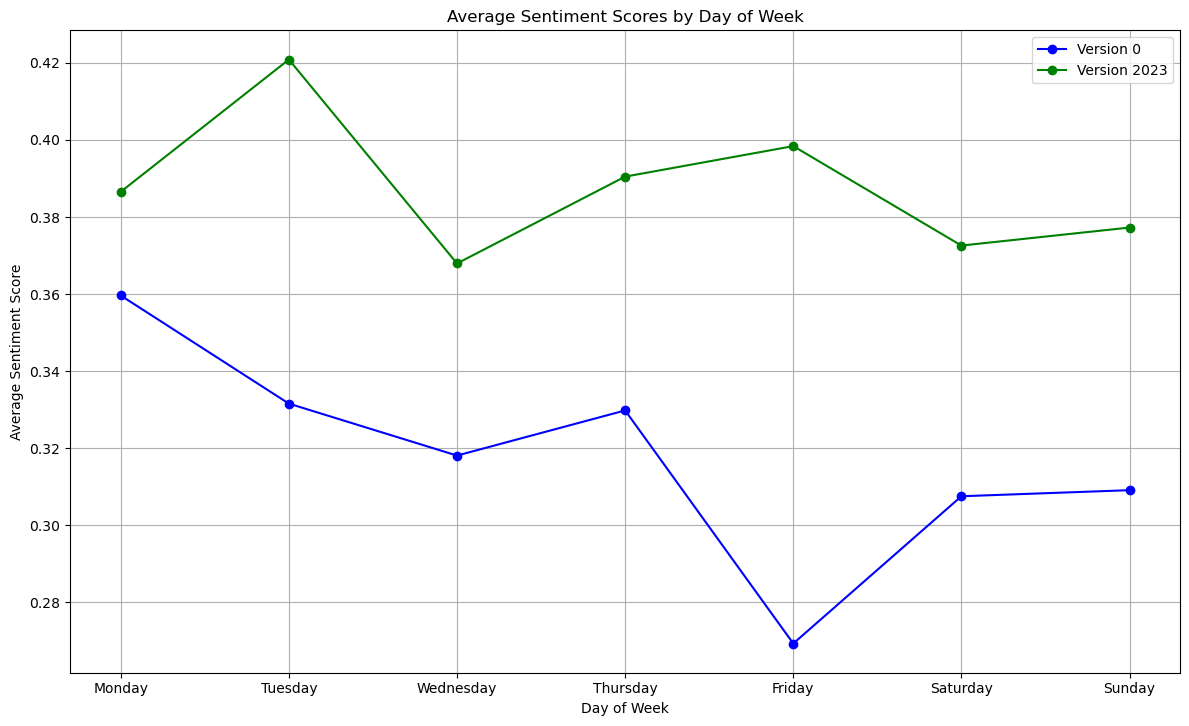

In [66]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# Step 2: Calculate the average sentiment score for each day
avg_sentiment_0_day = random_sample_0.groupby('day_of_week')['sentiment_score'].mean().reset_index()
avg_sentiment_2023_day = random_sample_2023.groupby('day_of_week')['sentiment_score'].mean().reset_index()


# Convert 'day_of_week' to a categorical type with the desired order
avg_sentiment_0_day['day_of_week'] = pd.Categorical(avg_sentiment_0_day['day_of_week'], categories=day_order, ordered=True)
avg_sentiment_2023_day['day_of_week'] = pd.Categorical(avg_sentiment_2023_day['day_of_week'], categories=day_order, ordered=True)


# Sort the DataFrames by the custom order
avg_sentiment_0_day = avg_sentiment_0_day.sort_values('day_of_week')
avg_sentiment_2023_day = avg_sentiment_2023_day.sort_values('day_of_week')


# Plotting the time series graph
plt.figure(figsize=(12, 8))

# Plot average sentiment score for each day in a single plot
plt.plot(avg_sentiment_0_day['day_of_week'], avg_sentiment_0_day['sentiment_score'], marker='o', label='Version 0', color='blue')
plt.plot(avg_sentiment_2023_day['day_of_week'], avg_sentiment_2023_day['sentiment_score'], marker='o', label='Version 2023', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

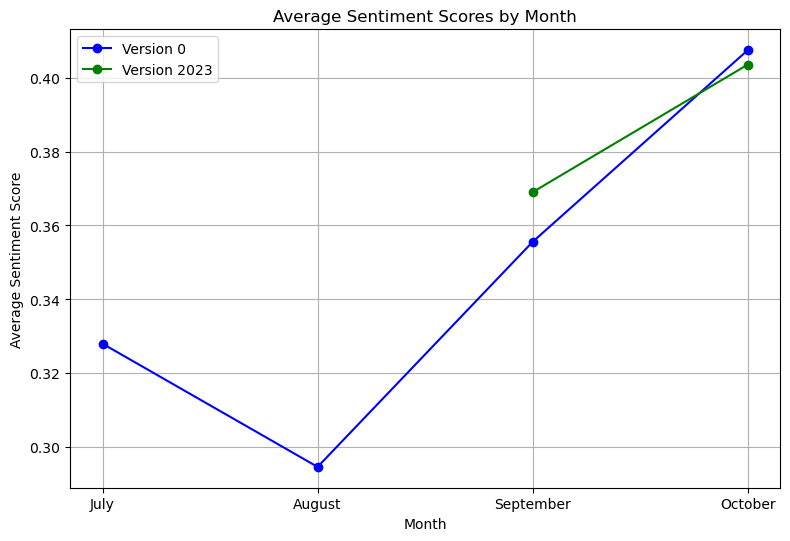

In [138]:
# Step 1: Filter rows with version 0 and month July
data_01 = data_1[(data_1['version_category'] == 0)]
data_2023 = data_1[(data_1['version_category'] == 2023)]

# Step 2: Get a random sample of 650 rows
random_sample_0 = data_01.sample(n=650, random_state=42)  # You can change the random_state
random_sample_2023 = data_2023.sample(n=650, random_state=42)  # You can change the random_state

# Convert 'Month' to a categorical type with the desired order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
random_sample_0['Month'] = pd.Categorical(random_sample_0['Month'], categories=month_order, ordered=True)
random_sample_2023['Month'] = pd.Categorical(random_sample_2023['Month'], categories=month_order, ordered=True)

# Step 3: Calculate the average sentiment score for each month
avg_sentiment_0_month = random_sample_0.groupby('Month')['sentiment_score'].mean().reset_index()
avg_sentiment_2023_month = random_sample_2023.groupby('Month')['sentiment_score'].mean().reset_index()

# Sort the DataFrames by the custom order
avg_sentiment_0_month = avg_sentiment_0_month.sort_values('Month')
avg_sentiment_2023_month = avg_sentiment_2023_month.sort_values('Month')

# Plotting the time series graph
plt.figure(figsize=(8, 6))

# Plot average sentiment score for each month in a single plot
plt.plot(avg_sentiment_0_month['Month'], avg_sentiment_0_month['sentiment_score'], marker='o', label='Version 0', color='blue')
plt.plot(avg_sentiment_2023_month['Month'], avg_sentiment_2023_month['sentiment_score'], marker='o', label='Version 2023', color='green')

# Set labels, legend, and grid
plt.title('Average Sentiment Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Comparing months with version 1.0 

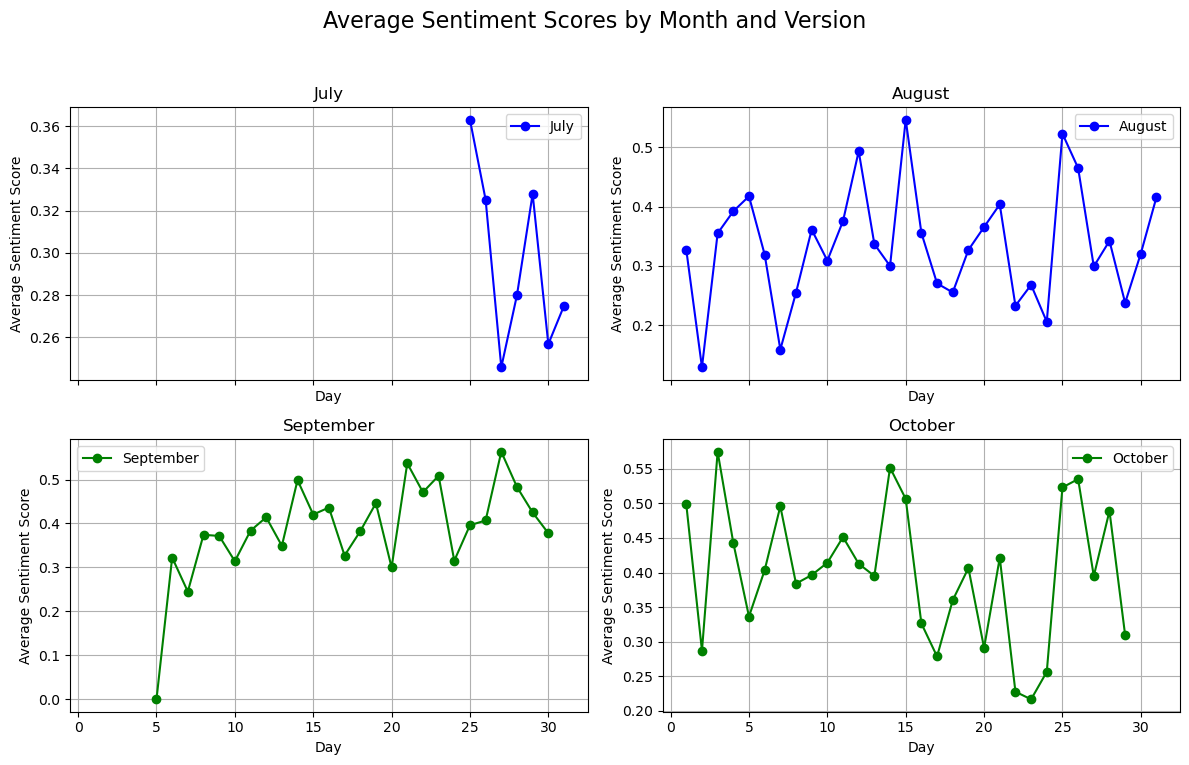

In [21]:
# Step 1: Filter rows with version 0 and month July
# data_july = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'July')]
# data_august = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'August')]
data_sept_0 = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'September')]
data_oct_0 = data_1[(data_1['version_category'] == 0) & (data_1['Month'] == 'October')]

# Step 2: Get a random sample of 650 rows
# random_sample_july = data_july.sample(n=650, random_state=42)  # You can change the random_state
# random_sample_august = data_august.sample(n=650, random_state=42)  # You can change the random_state
random_sample_sept_0 = data_sept.sample(n=650, random_state=42)  # You can change the random_state
random_sample_oct_0 = data_oct.sample(n=650, random_state=42)  # You can change the random_state

# Display the resulting DataFrame
# Step 2: Calculate the average sentiment score for each day
# avg_sentiment_july = random_sample_july.groupby('Day')['sentiment_score'].mean().reset_index()
# avg_sentiment_august = random_sample_august.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_sept_0 = random_sample_sept_0.groupby('Day')['sentiment_score'].mean().reset_index()
avg_sentiment_oct_0 = random_sample_oct_0.groupby('Day')['sentiment_score'].mean().reset_index()

# Plotting the time series graph
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Plot average sentiment score for each day in separate subplots
axs[0, 0].plot(avg_sentiment_july['Day'], avg_sentiment_july['sentiment_score'], marker='o', label='July', color='blue')
axs[0, 0].set_title('July')

axs[0, 1].plot(avg_sentiment_august['Day'], avg_sentiment_august['sentiment_score'], marker='o', label='August', color='blue')
axs[0, 1].set_title('August')

axs[1, 0].plot(avg_sentiment_sept_0['Day'], avg_sentiment_sept_0['sentiment_score'], marker='o', label='September', color='green')
axs[1, 0].set_title('September')

axs[1, 1].plot(avg_sentiment_oct_0['Day'], avg_sentiment_oct_0['sentiment_score'], marker='o', label='October', color='green')
axs[1, 1].set_title('October')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Day', ylabel='Average Sentiment Score')
    ax.legend()
    ax.grid(True)

# Add a common title to the entire figure
plt.suptitle('Average Sentiment Scores by Month and Version', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Calculating Cron-batch

In [59]:
import pandas as pd
data_topic = pd.read_csv('chatgpt_1_read_1.csv')
data_topic

Unnamed: 0  appVersion          at  \
0           27953    1.0.0016   7/25/2023   
1           17580    1.0.0016   7/25/2023   
2            5786    1.0.0016   7/25/2023   
3           17579    1.0.0016   7/25/2023   
4            5794    1.0.0016   7/25/2023   
...           ...         ...         ...   
19517       19347  1.2023.285  10/29/2023   
19518       19293  1.2023.285  10/29/2023   
19519       19349  1.2023.285  10/29/2023   
19520       19342  1.2023.285  10/29/2023   
19521       19634  1.2023.284  10/29/2023   

                                                 content       repliedAt  \
0                                            Finally App             NaN   
1                      This this next level friend to me             NaN   
2      It's amazing 😍 But issue is , Text paragraph f...             NaN   
3      First review a am so happy 😊 Thi app is worded...             NaN   
4      Good UI, somehow feels bit faster on app. But ...  9/6/2023 12:40   
...                                                  ...             ...   
19517  very very much useful app to all students ☺️ T...             NaN   
19518  Voice recognition doesnt work for me. I have t...             NaN   
19519  most helpful app for students, thankyou chatgp...             NaN   
19520  great app but I wish I could produce pictures ...             NaN   
19521                                 man it's very cool             NaN   

                                            replyContent reviewCreatedVersion  \
0                                                    NaN             1.0.0016   
1                                                    NaN             1.0.0016   
2                                                    NaN             1.0.0016   
3                                                    NaN             1.0.0016   
4      Thanks for your feedback on the issue with dar...             1.0.0016   
...                                                  ...                  ...   
19517                                                NaN           1.2023.285   
19518                                                NaN           1.2023.285   
19519                                                NaN           1.2023.285   
19520                                                NaN           1.2023.285   
19521                                                NaN           1.2023.284   

                                   reviewId  score  thumbsUpCount  ...  \
0      822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0  ...   
1      71c9025f-3497-428f-b79e-e2e2737e3cb9      5              0  ...   
2      991296fe-5dc4-4264-932f-6501a77df1f7      4              0  ...   
3      fa095329-27ec-461d-b4b8-bd6949a60909      5              0  ...   
4      60c3b959-14d7-4d86-82ce-e0986c9bee5e      3              0  ...   
...                                     ...    ...            ...  ...   
19517  a583103a-fb82-4fb4-85d9-7f36ae966b79      5              0  ...   
19518  a53aa455-7238-4c71-ba5c-f3a400bb2933      4              0  ...   
19519  7c08fe63-82ea-4e68-9ad2-fb58790e34d2      5              0  ...   
19520  253c1a9f-169e-4000-8ccd-672ef990fbce      4              0  ...   
19521  e7593309-9b13-4741-af66-b3d7159c6892      5              0  ...   

      automated_readability_index dale_chall_readability_score  \
0                             3.1                        11.63   
1                             0.3                         0.35   
2                            10.5                        10.47   
3                             4.6                         8.49   
4                             8.9                        11.34   
...                           ...                          ...   
19517                         8.5                         9.92   
19518                        35.8                        12.62   
19519                         7.1                        12.86   
19520                         3

In [56]:
import pingouin as pg

# Assume df is your DataFrame with the relevant columns
text_features_1 = data_topic[['sentiment_score', 'score']]

# Calculate Cronbach's Alpha
alpha, items = pg.cronbach_alpha(text_features_1)

print(f"Cronbach's Alpha: {alpha}")
print("Item scores:")
print(items)

Cronbach's Alpha: 0.3595581222964668
Item scores:
[0.341 0.377]


In [60]:
import pandas as pd
import numpy as np

corr = data_topic.corr()
corr.style.background_gradient(cmap='YlGn')

t:\Anaconda\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
t:\Anaconda\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [61]:
import pandas as pd
temp_rating = pd.read_csv('temp_rating.csv')
temp_rating

rating  sentiment_score  automated_readability_index  difficult_words  \
0          5             0.28                         28.7               10   
1          5             0.00                          5.2                1   
2          5             0.50                          1.8                1   
3          5             0.00                          0.8                0   
4          4             0.70                          5.1                1   
...      ...              ...                          ...              ...   
5180       2             0.13                         26.3               10   
5181       5             0.70                          3.6                1   
5182       5             0.20                          3.6                0   
5183       1             0.60                          3.7                1   
5184       5             0.00                          3.6                1   

      reading_time  version_category  
0             3.76                 0  
1             0.68                 0  
2             0.32                 0  
3             0.13                 0  
4             0.62                 0  
...            ...               ...  
5180          3.44              2023  
5181          0.41              2023  
5182          0.22              2023  
5183          0.35              2023  
5184          0.41              2023  

[5185 rows x 6 columns]

In [63]:
corr = temp_rating.corr()
corr.style.background_gradient(cmap='YlGn')

In [76]:
df_grouped_month_day_year

Month  Day  Year  sentiment_score
0      August    1  2023         0.312132
1      August    2  2023         0.287415
2      August    3  2023         0.300373
3      August    4  2023         0.229083
4      August    5  2023         0.261954
..        ...  ...   ...              ...
92  September   26  2023         0.388848
93  September   27  2023         0.387801
94  September   28  2023         0.420331
95  September   29  2023         0.365195
96  September   30  2023         0.344241

[97 rows x 4 columns]

In [ ]:
df_grouped_month_day_year['Date'] = pd.to_datetime(df_grouped_month_day_year[['Year', 'Month', 'Day']])
data_1['date_column'] = pd.to_datetime(data_1['date'])


In [85]:
data_1['date_column']

0       2023-07-25
1       2023-07-25
2       2023-07-25
3       2023-07-25
4       2023-07-25
           ...    
19517   2023-10-29
19518   2023-10-29
19519   2023-10-29
19520   2023-10-29
19521   2023-10-29
Name: date_column, Length: 19522, dtype: datetime64[ns]

In [ ]:
# Group by month, day, and year and calculate the average sentiment score
df_grouped_month_day_year = data_1.groupby(['Month', 'Day', 'Year'])['sentiment_score'].mean().reset_index()

# Plotting the time series graph
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month in df_grouped_month_day_year['Month'].unique():
    month_data = df_grouped_month_day_year[df_grouped_month_day_year['Month'] == month]
    plt.plot(month_data['Day'], month_data['sentiment_score'], marker='o', label=f'{month}')

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
df_grouped_month_day_year

Month  Day  Year  sentiment_score
0      August    1  2023         0.312132
1      August    2  2023         0.287415
2      August    3  2023         0.300373
3      August    4  2023         0.229083
4      August    5  2023         0.261954
..        ...  ...   ...              ...
92  September   26  2023         0.388848
93  September   27  2023         0.387801
94  September   28  2023         0.420331
95  September   29  2023         0.365195
96  September   30  2023         0.344241

[97 rows x 4 columns]

In [ ]:
# Convert 'Month' to numerical representation (month number)
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data_1['Month_num'] = data_1['Month'].map(month_to_number)
data_1['date_new'] = pd.to_datetime(data_1[['Year', 'Month_num', 'Day']])
data_1['date_new']

In [92]:
data_1

Unnamed: 0  appVersion          at  \
0           27953    1.0.0016   7/25/2023   
1           17580    1.0.0016   7/25/2023   
2            5786    1.0.0016   7/25/2023   
3           17579    1.0.0016   7/25/2023   
4            5794    1.0.0016   7/25/2023   
...           ...         ...         ...   
19517       19347  1.2023.285  10/29/2023   
19518       19293  1.2023.285  10/29/2023   
19519       19349  1.2023.285  10/29/2023   
19520       19342  1.2023.285  10/29/2023   
19521       19634  1.2023.284  10/29/2023   

                                                 content       repliedAt  \
0                                            Finally App             NaN   
1                      This this next level friend to me             NaN   
2      It's amazing 😍 But issue is , Text paragraph f...             NaN   
3      First review a am so happy 😊 Thi app is worded...             NaN   
4      Good UI, somehow feels bit faster on app. But ...  9/6/2023 12:40   
...                                                  ...             ...   
19517  very very much useful app to all students ☺️ T...             NaN   
19518  Voice recognition doesnt work for me. I have t...             NaN   
19519  most helpful app for students, thankyou chatgp...             NaN   
19520  great app but I wish I could produce pictures ...             NaN   
19521                                 man it's very cool             NaN   

                                            replyContent reviewCreatedVersion  \
0                                                    NaN             1.0.0016   
1                                                    NaN             1.0.0016   
2                                                    NaN             1.0.0016   
3                                                    NaN             1.0.0016   
4      Thanks for your feedback on the issue with dar...             1.0.0016   
...                                                  ...                  ...   
19517                                                NaN           1.2023.285   
19518                                                NaN           1.2023.285   
19519                                                NaN           1.2023.285   
19520                                                NaN           1.2023.285   
19521                                                NaN           1.2023.284   

                                   reviewId  score  thumbsUpCount  ...  \
0      822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0  ...   
1      71c9025f-3497-428f-b79e-e2e2737e3cb9      5              0  ...   
2      991296fe-5dc4-4264-932f-6501a77df1f7      4              0  ...   
3      fa095329-27ec-461d-b4b8-bd6949a60909      5              0  ...   
4      60c3b959-14d7-4d86-82ce-e0986c9bee5e      3              0  ...   
...                                     ...    ...            ...  ...   
19517  a583103a-fb82-4fb4-85d9-7f36ae966b79      5              0  ...   
19518  a53aa455-7238-4c71-ba5c-f3a400bb2933      4              0  ...   
19519  7c08fe63-82ea-4e68-9ad2-fb58790e34d2      5              0  ...   
19520  253c1a9f-169e-4000-8ccd-672ef990fbce      4              0  ...   
19521  e7593309-9b13-4741-af66-b3d7159c6892      5              0  ...   

      reading_time text_standard version_category        date    Month  Day  \
0             0.15           0.5                0   7/25/2023     July   25   
1             0.40          -0.5                0   7/25/2023     July   25   
2             1.44          10.5                0   7/25/2023     July   25   
3             0.71           3.5                0   7/25/2023     July   25   
4             1.12           8.5                0   7/25/2023     July   25   
...            ...           ...              ...         ...      ...  ...   
19517         0.84           4.5             2023  10/29/2023  October   29   
19518         4.97          12.5             2023  10/29/20

In [82]:
df_grouped_month_day_year

Month  Day  Year  sentiment_score
0      August    1  2023         0.312132
1      August    2  2023         0.287415
2      August    3  2023         0.300373
3      August    4  2023         0.229083
4      August    5  2023         0.261954
..        ...  ...   ...              ...
92  September   26  2023         0.388848
93  September   27  2023         0.387801
94  September   28  2023         0.420331
95  September   29  2023         0.365195
96  September   30  2023         0.344241

[97 rows x 4 columns]

In [108]:
# Convert 'at' column to datetime for sorting months
month_order = ['July', 'August', 'September', 'October']
data_1['month_ord'] = pd.Categorical(data_1['Month'], categories=month_order, ordered=True)

# Group by month and calculate the mean sentiment score
df_agg = data_1.groupby('month_ord')['sentiment_score'].mean().reset_index()

# Plotting
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='at', y='sentiment_score', data=df_agg, marker='o', color='blue')
# plt.title('Average Sentiment Score Over Months')
# plt.xlabel('Month')
# plt.ylabel('Average Sentiment Score')
# plt.show()

In [111]:
df_agg

month_ord  sentiment_score
0       July         0.324806
1     August         0.341673
2  September         0.388241
3    October         0.401434

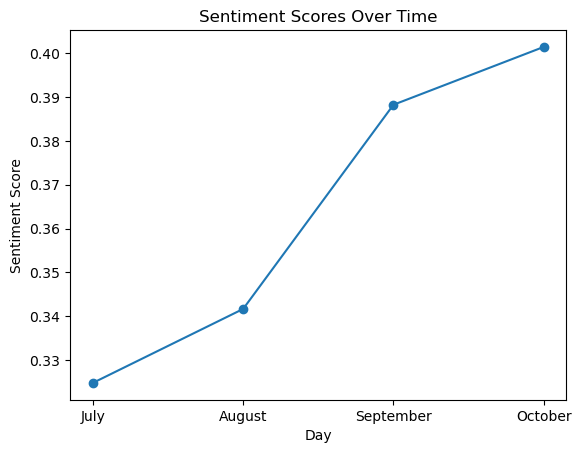

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame with columns 'day_of_week' and 'sentiment_score'
df = df_agg  # or avg_sentiment_2023_day, depending on the version

# Optionally, set 'day_of_week' as the index for time series data
# df.set_index('day_of_week', inplace=True)
plt.plot(df['month_ord'], df['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()


In [139]:
# Fit ARIMA model
model = ARIMA(df['sentiment_score'], order=(1, 0, 5))  # Replace p, d, q with appropriate values
results = model.fit()

# Generate predictions
predictions = results.predict(start=0, end=len(df) + 10)  # Adjust the prediction range as needed


t:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
t:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


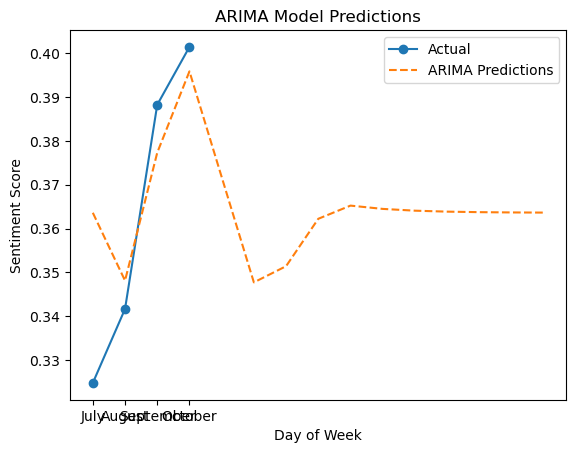

In [140]:
plt.plot(df['month_ord'], df['sentiment_score'], marker='o', label='Actual')
plt.plot(predictions.index, predictions, linestyle='dashed', label='ARIMA Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Day of Week')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


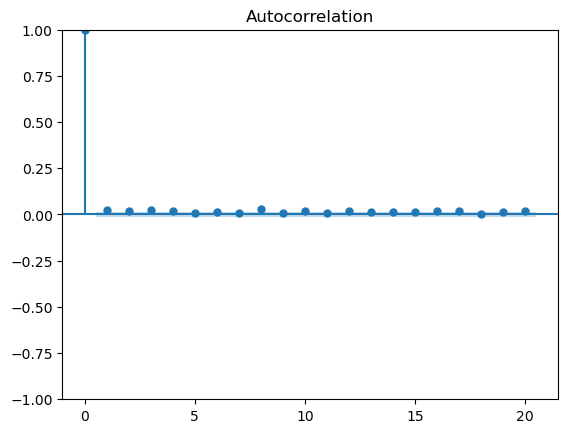

t:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


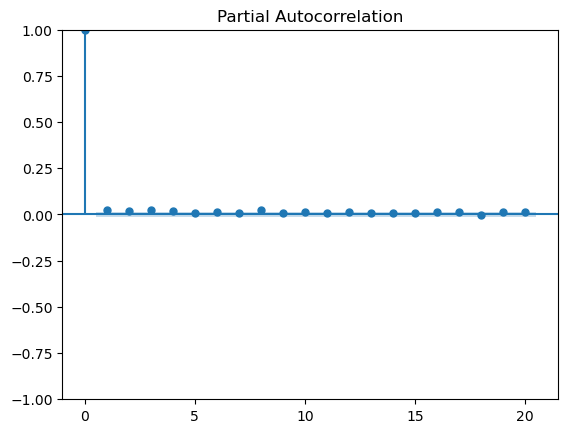

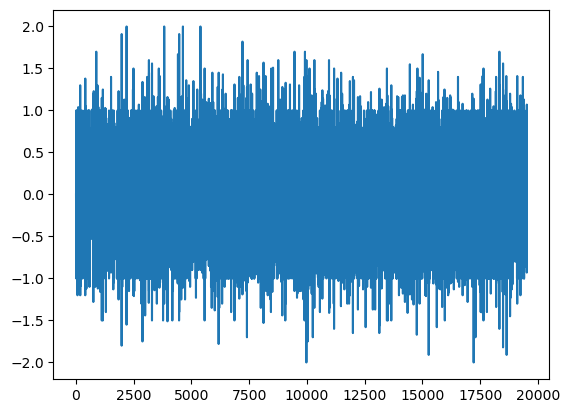

                               SARIMAX Results                                
Dep. Variable:        sentiment_score   No. Observations:                19522
Model:                 ARIMA(1, 1, 5)   Log Likelihood               -6889.422
Date:                Thu, 07 Dec 2023   AIC                          13792.844
Time:                        00:30:44   BIC                          13847.999
Sample:                             0   HQIC                         13810.910
                              - 19522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9176      0.079    -11.687      0.000      -1.071      -0.764
ma.L1         -0.0670      0.079     -0.850      0.395      -0.222       0.088
ma.L2         -0.9126      0.078    -11.749      0.0

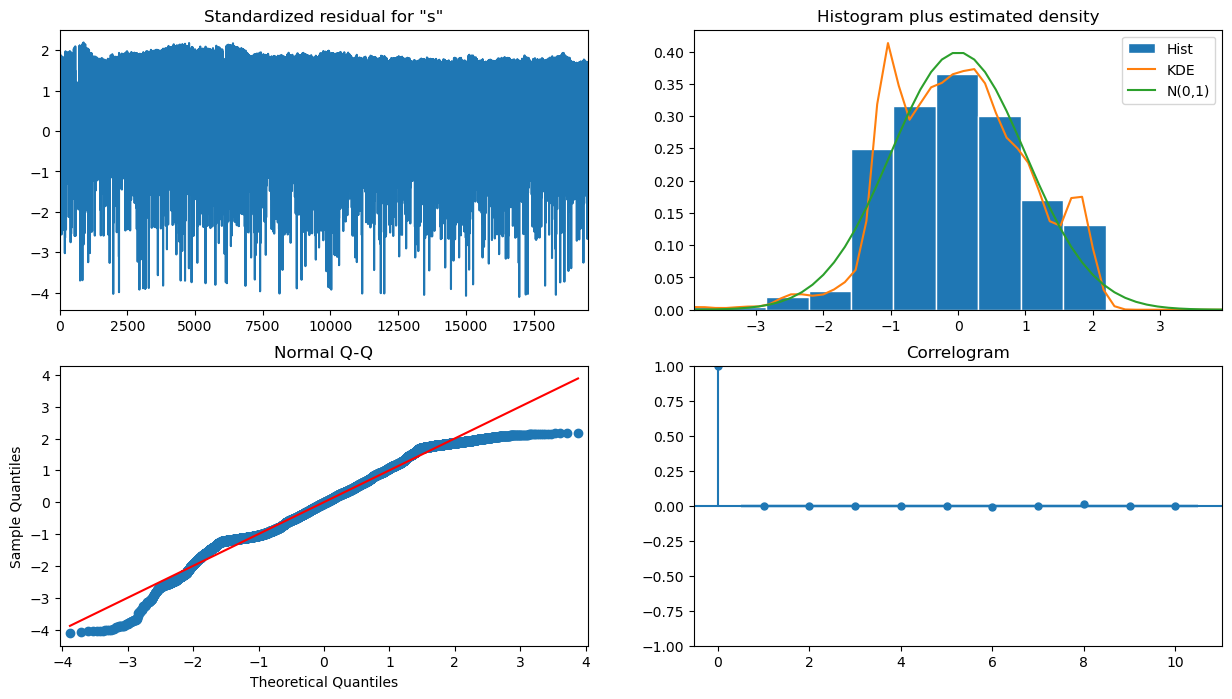

ValueError: too many values to unpack (expected 3)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df is your time series data
# Convert the date columns to datetime format
# data_1['date_new'] = pd.to_datetime(data_1[['Year', 'Month', 'Day']])
# data_1['date_new']
# Set the Date column as the index
# data_1.set_index('date_column', inplace=True)

# Extract the sentiment_score column
sentiment_series = data_1['sentiment_score']

# Plot ACF and PACF to identify potential values for p and q
plot_acf(sentiment_series, lags=20)
plt.show()

plot_pacf(sentiment_series, lags=20)
plt.show()

# Differencing to make the series stationary (if necessary)
data_1['diff_sentiment'] = sentiment_series.diff().dropna()
plt.plot(data_1['diff_sentiment'])
plt.show()

# Define the ARIMA model (p, d, q)
# Replace p, d, q with your chosen values
p = 1  # AR order
d = 1  # Differencing order
q = 5  # MA order

# Fit the ARIMA model
model = ARIMA(sentiment_series, order=(p, d, q))
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the observed vs. predicted values
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 30  # Change this value based on your needs
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)

# Plot the original series and the forecasted values
plt.plot(sentiment_series.index, sentiment_series, label='Observed')
plt.plot(pd.date_range(sentiment_series.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='dashed', color='red')
plt.fill_between(pd.date_range(sentiment_series.index[-1], periods=forecast_steps + 1, freq='D')[1:], conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2)
plt.legend()
plt.show()


In [128]:
import pandas as pd
data_day = pd.read_csv('chatgpt_time.csv')
data_day

Unnamed: 0  appVersion          at  \
0               0    1.0.0016   7/25/2023   
1               1    1.0.0016   7/25/2023   
2               2    1.0.0016   7/25/2023   
3               3    1.0.0016   7/25/2023   
4               4    1.0.0016   7/25/2023   
...           ...         ...         ...   
19517       19517  1.2023.285  10/29/2023   
19518       19518  1.2023.285  10/29/2023   
19519       19519  1.2023.285  10/29/2023   
19520       19520  1.2023.285  10/29/2023   
19521       19521  1.2023.284  10/29/2023   

                                                 content       repliedAt  \
0                                            Finally App             NaN   
1                      This this next level friend to me             NaN   
2      It's amazing 😍 But issue is , Text paragraph f...             NaN   
3      First review a am so happy 😊 Thi app is worded...             NaN   
4      Good UI, somehow feels bit faster on app. But ...  9/6/2023 12:40   
...                                                  ...             ...   
19517  very very much useful app to all students ☺️ T...             NaN   
19518  Voice recognition doesnt work for me. I have t...             NaN   
19519  most helpful app for students, thankyou chatgp...             NaN   
19520  great app but I wish I could produce pictures ...             NaN   
19521                                 man it's very cool             NaN   

                                            replyContent reviewCreatedVersion  \
0                                                    NaN             1.0.0016   
1                                                    NaN             1.0.0016   
2                                                    NaN             1.0.0016   
3                                                    NaN             1.0.0016   
4      Thanks for your feedback on the issue with dar...             1.0.0016   
...                                                  ...                  ...   
19517                                                NaN           1.2023.285   
19518                                                NaN           1.2023.285   
19519                                                NaN           1.2023.285   
19520                                                NaN           1.2023.285   
19521                                                NaN           1.2023.284   

                                   reviewId  score  thumbsUpCount  ...  \
0      822b84e3-6cdb-4d43-ae22-1e6f333b8673      5              0  ...   
1      71c9025f-3497-428f-b79e-e2e2737e3cb9      5              0  ...   
2      991296fe-5dc4-4264-932f-6501a77df1f7      4              0  ...   
3      fa095329-27ec-461d-b4b8-bd6949a60909      5              0  ...   
4      60c3b959-14d7-4d86-82ce-e0986c9bee5e      3              0  ...   
...                                     ...    ...            ...  ...   
19517  a583103a-fb82-4fb4-85d9-7f36ae966b79      5              0  ...   
19518  a53aa455-7238-4c71-ba5c-f3a400bb2933      4              0  ...   
19519  7c08fe63-82ea-4e68-9ad2-fb58790e34d2      5              0  ...   
19520  253c1a9f-169e-4000-8ccd-672ef990fbce      4              0  ...   
19521  e7593309-9b13-4741-af66-b3d7159c6892      5              0  ...   

      text_standard version_category        date    Month Day  Year  \
0               0.5                0   7/25/2023     July  25  2023   
1              -0.5                0   7/25/2023     July  25  2023   
2              10.5                0   7/25/2023     July  25  2023   
3               3.5                0   7/25/2023     July  25  2023   
4               8.5                0   7/25/2023     July  25  2023   
...             ...              ...         ...      ...  ..   ...   
19517           4.5             2023  10/29/2023  October  29  2023   
19518          12.5             2023  10/29/2023  October  29  2023   
19519           6.5             2023  10/29/2023  Oc

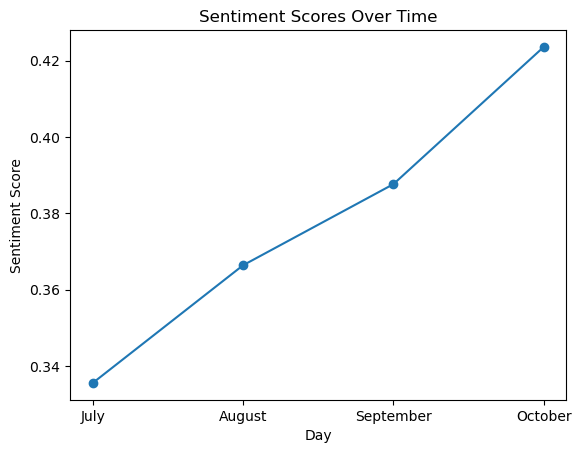

In [130]:
# calculating avg sentiment score based on random sampling
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

random_sample_month = data_day.sample(n=1950, random_state=42)
random_sample_month['Month'] = pd.Categorical(random_sample_month['Month'], categories=month_order, ordered=True)
avg_sentiment_month = random_sample_month.groupby('Month')['sentiment_score'].mean().reset_index()

plt.plot(avg_sentiment_month['Month'], avg_sentiment_month['sentiment_score'], marker='o')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.show()


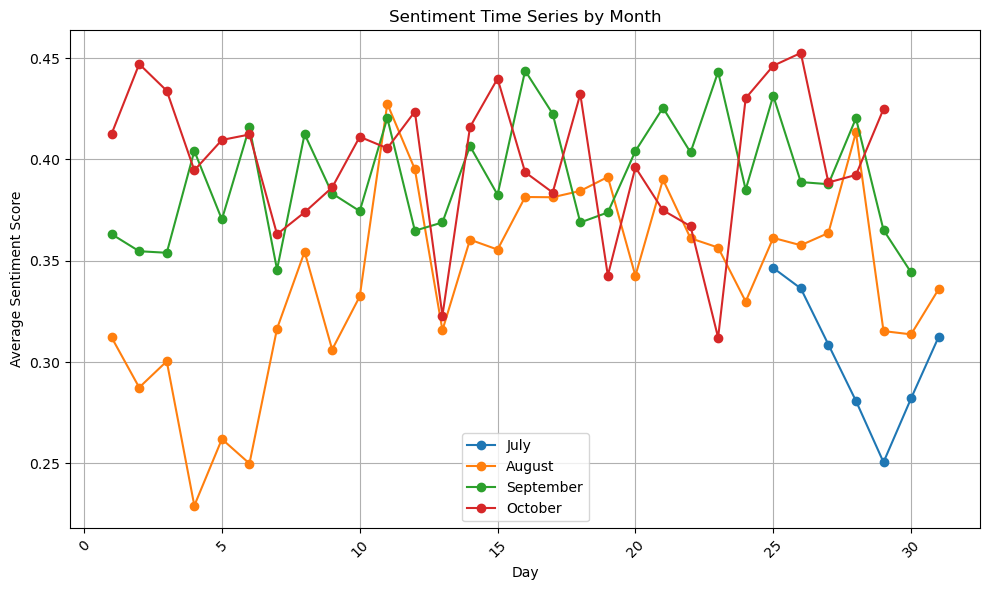

In [135]:
df_grouped_month_day_year_1 = data_day.groupby(['Month_num', 'Day', 'Year'])['sentiment_score'].mean().reset_index()

# Group by month, day, and year and calculate the average sentiment score
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Plotting the time series graph
plt.figure(figsize=(10, 6))

# Plot individual lines for each month
for month in df_grouped_month_day_year_1['Month_num'].unique():
    month_data_1 = df_grouped_month_day_year_1[df_grouped_month_day_year_1['Month_num'] == month]
    plt.plot(month_data_1['Day'], month_data_1['sentiment_score'], marker='o', label=month_names[month])

plt.title('Sentiment Time Series by Month')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
import pingouin as pg

# Assume df is your DataFrame with the relevant columns
text_features_1 = data_1[['sentiment_score', 'score']]

# Calculate Cronbach's Alpha
alpha, items = pg.cronbach_alpha(text_features_1)

print(f"Cronbach's Alpha: {alpha}")
print("Item scores:")
print(items)

Cronbach's Alpha: 0.35983818432525516
Item scores:
[0.342 0.378]
